In [3]:
import scanpy as sc
from genevector.data import GeneVectorDataset
from genevector.model import GeneVector
from genevector.embedding import GeneEmbedding, CellEmbedding
import gdown
import os

sc.settings.verbosity = 3
sc.logging.print_header()
sc.settings.set_figure_params(dpi=100, facecolor='white')

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.22.4 scipy==1.9.0 pandas==1.5.1 scikit-learn==1.0.2 statsmodels==0.13.2 python-igraph==0.9.11 pynndescent==0.5.7


# Load Cancer Spectrum Data and Embedding

In [19]:

url = "https://drive.google.com/uc?id=1AlNty2iJ_LteqprxixcOy94SpQitrAEX"
output = 'spectrum_cancer.h5ad'
if not os.path.exists("spectrum_cancer.h5ad"):
    gdown.download(url, output, quiet=False)
adata = sc.read("spectrum_cancer.h5ad")
site = []
for x in adata.obs["author_sample_id"]:
    if "BOWEL" in x:
        site.append("BOWEL")
    else:
        site.append("ADNEXA")
adata.obs["site"] = site

/Users/ceglian/miniconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [20]:
dataset = GeneVectorDataset(adata)

Loading Expression.


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14085376/14085376 [02:06<00:00, 110923.78it/s]


Reindexing Cooc


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 87229/87229 [00:02<00:00, 29107.62it/s]


In [21]:
retrain = False
if retrain:
    cmps = GeneVector(dataset,
                      output_file="spectrum_cancer.vec",
                      batch_size=200000,
                      min_pct=0.0,
                      max_pct=0.3,
                      emb_dimension=100)
    cmps.train(10000,threshold=1e-8)

In [23]:
embed = GeneEmbedding("embeddings/spectrum_cancer.vec", dataset,vector="average")

Loading average of 1st and 2nd weights.


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2500/2500 [00:00<00:00, 3900952.38it/s]


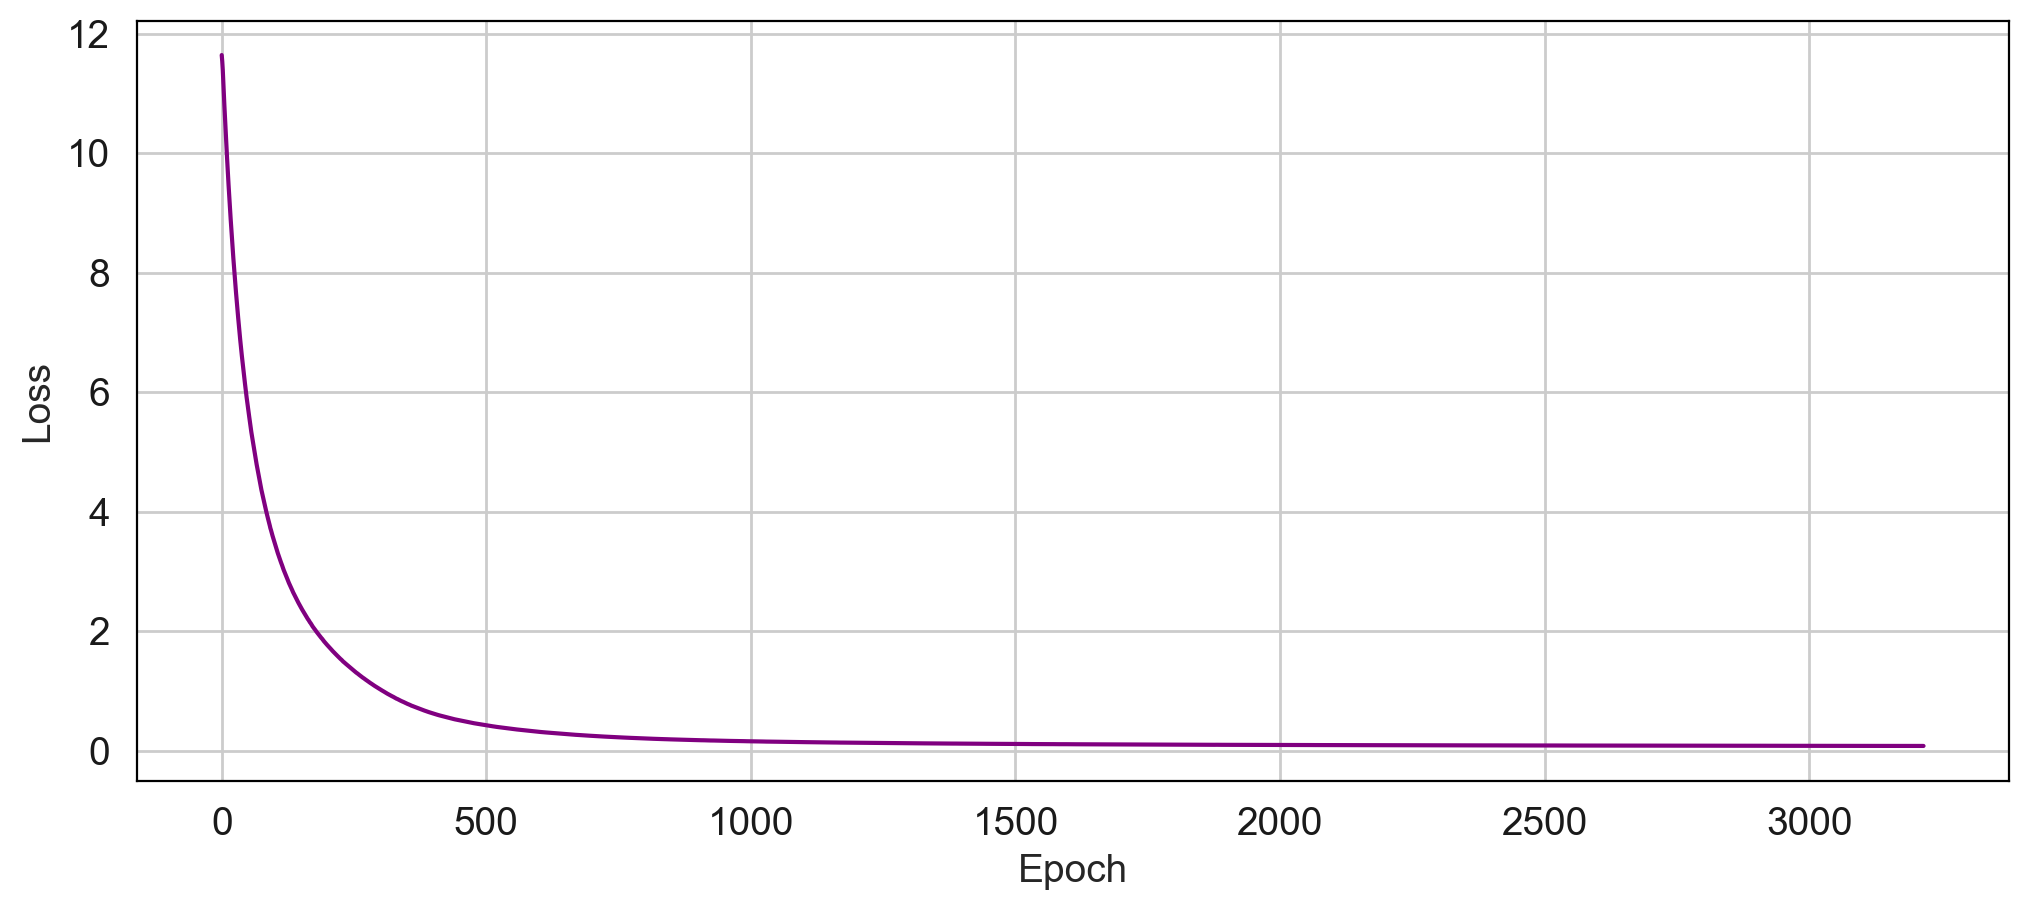

In [260]:
cmps.plot()

# Generate Metagenes

In [25]:
gdata = embed.get_adata(resolution=100)
metagenes = embed.get_metagenes(gdata)

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
running Leiden clustering
    finished: found 787 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:02)


In [26]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

normalizing counts per cell
    finished (0:00:00)


In [27]:
embed.score_metagenes(adata, metagenes)

computing score '58_SCORE'
    finished: added
    '58_SCORE', score of gene set (adata.obs).
    48 total control genes are used. (0:00:00)
computing score '59_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '59_SCORE', score of gene set (adata.obs).
    245 total control genes are used. (0:00:00)
computing score '104_SCORE'
    finished: added
    '104_SCORE', score of gene set (adata.obs).
    195 total control genes are used. (0:00:00)
computing score '287_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '287_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '638_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '638_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '91_SCORE'
    finished: added
    '91_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '694_SCORE'
computing score '774_SCORE'
computing score '505_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '505_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '263_SCORE'
    finished: added
    '263_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '281_SCORE'
computing score '238_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '238_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '15_SCORE'
    finished: added
    '15_SCORE', score of gene set (adata.obs).
    97 total control genes are used. (0:00:00)
computing score '252_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '252_SCORE', score of gene set (adata.obs).
    147 total control genes are used. (0:00:00)
computing score '8_SCORE'
    finished: added
    '8_SCORE', score of gene set (adata.obs).
    293 total control genes are used. (0:00:00)
computing score '506_SCORE'
computing score '182_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '182_SCORE', score of gene set (adata.obs).
    146 total control genes are used. (0:00:00)
computing score '18_SCORE'
    finished: added
    '18_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '261_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '261_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '286_SCORE'
    finished: added
    '286_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '32_SCORE'
computing score '507_SCORE'
computing score '316_SCORE'
computing score '186_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '186_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '253_SCORE'
    finished: added
    '253_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '217_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '217_SCORE', score of gene set (adata.obs).
    146 total control genes are used. (0:00:00)
computing score '254_SCORE'
    finished: added
    '254_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '294_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '294_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '685_SCORE'
computing score '1_SCORE'
    finished: added
    '1_SCORE', score of gene set (adata.obs).
    145 total control genes are used. (0:00:00)
computing score '255_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '255_SCORE', score of gene set (adata.obs).
    147 total control genes are used. (0:00:00)
computing score '475_SCORE'
computing score '256_SCORE'
    finished: added
    '256_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '384_SCORE'
computing score '5_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '5_SCORE', score of gene set (adata.obs).
    191 total control genes are used. (0:00:00)
computing score '86_SCORE'
    finished: added
    '86_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '764_SCORE'
computing score '17_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '17_SCORE', score of gene set (adata.obs).
    195 total control genes are used. (0:00:00)
computing score '188_SCORE'
    finished: added
    '188_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '257_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '257_SCORE', score of gene set (adata.obs).
    48 total control genes are used. (0:00:00)
computing score '258_SCORE'
computing score '62_SCORE'
    finished: added
    '62_SCORE', score of gene set (adata.obs).
    147 total control genes are used. (0:00:00)
computing score '259_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '259_SCORE', score of gene set (adata.obs).
    97 total control genes are used. (0:00:00)
computing score '717_SCORE'
    finished: added
    '717_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '508_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '508_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '42_SCORE'
    finished: added
    '42_SCORE', score of gene set (adata.obs).
    96 total control genes are used. (0:00:00)
computing score '282_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '282_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '366_SCORE'
    finished: added
    '366_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '72_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '72_SCORE', score of gene set (adata.obs).
    147 total control genes are used. (0:00:00)
computing score '87_SCORE'
    finished: added
    '87_SCORE', score of gene set (adata.obs).
    147 total control genes are used. (0:00:00)
computing score '100_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '100_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '428_SCORE'
computing score '152_SCORE'
    finished: added
    '152_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '9_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '9_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '22_SCORE'
    finished: added
    '22_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '108_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '108_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '260_SCORE'
    finished: added
    '260_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '404_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '404_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '765_SCORE'
    finished: added
    '765_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '458_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '458_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '139_SCORE'
    finished: added
    '139_SCORE', score of gene set (adata.obs).
    147 total control genes are used. (0:00:00)
computing score '509_SCORE'
computing score '63_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '63_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '452_SCORE'
    finished: added
    '452_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '786_SCORE'
computing score '478_SCORE'
computing score '305_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '305_SCORE', score of gene set (adata.obs).
    97 total control genes are used. (0:00:00)
computing score '381_SCORE'
    finished: added
    '381_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '262_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '262_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '510_SCORE'
    finished: added
    '510_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '250_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '250_SCORE', score of gene set (adata.obs).
    147 total control genes are used. (0:00:00)
computing score '0_SCORE'
    finished: added
    '0_SCORE', score of gene set (adata.obs).
    97 total control genes are used. (0:00:00)
computing score '187_SCORE'
computing score '165_SCORE'
computing score '53_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '53_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '493_SCORE'
    finished: added
    '493_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '667_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '667_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '277_SCORE'
    finished: added
    '277_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '511_SCORE'
computing score '193_SCORE'
computing score '512_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '512_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '39_SCORE'
computing score '164_SCORE'
    finished: added
    '164_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '3_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '3_SCORE', score of gene set (adata.obs).
    147 total control genes are used. (0:00:00)
computing score '14_SCORE'
    finished: added
    '14_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '370_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '370_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '105_SCORE'
    finished: added
    '105_SCORE', score of gene set (adata.obs).
    145 total control genes are used. (0:00:00)
computing score '208_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '208_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '513_SCORE'
computing score '514_SCORE'
    finished: added
    '514_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '593_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '593_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '515_SCORE'
computing score '170_SCORE'
    finished: added
    '170_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '479_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '479_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '213_SCORE'
    finished: added
    '213_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '25_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '25_SCORE', score of gene set (adata.obs).
    245 total control genes are used. (0:00:00)
computing score '516_SCORE'
    finished: added
    '516_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '692_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '692_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '614_SCORE'
    finished: added
    '614_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '4_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

    finished: added
    '4_SCORE', score of gene set (adata.obs).
    195 total control genes are used. (0:00:00)
computing score '48_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '48_SCORE', score of gene set (adata.obs).
    195 total control genes are used. (0:00:00)
computing score '27_SCORE'
    finished: added
    '27_SCORE', score of gene set (adata.obs).
    146 total control genes are used. (0:00:00)
computing score '71_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

    finished: added
    '71_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '158_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '158_SCORE', score of gene set (adata.obs).
    146 total control genes are used. (0:00:00)
computing score '526_SCORE'
computing score '214_SCORE'
    finished: added
    '214_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '487_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[str(p)+"_SCORE"] = 0.
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future versi

    finished: added
    '487_SCORE', score of gene set (adata.obs).
    97 total control genes are used. (0:00:00)
computing score '264_SCORE'
computing score '400_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented

    finished: added
    '400_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '248_SCORE'
    finished: added
    '248_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '265_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

    finished: added
    '265_SCORE', score of gene set (adata.obs).
    97 total control genes are used. (0:00:00)
computing score '176_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '176_SCORE', score of gene set (adata.obs).
    48 total control genes are used. (0:00:00)
computing score '77_SCORE'
    finished: added
    '77_SCORE', score of gene set (adata.obs).
    48 total control genes are used. (0:00:00)
computing score '36_SCORE'
computing score '518_SCORE'
computing score '2_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

    finished: added
    '2_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '345_SCORE'
computing score '519_SCORE'
computing score '465_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented

    finished: added
    '465_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '522_SCORE'
    finished: added
    '522_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '520_SCORE'
computing score '41_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

    finished: added
    '41_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '227_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '227_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '547_SCORE'
    finished: added
    '547_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '155_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

    finished: added
    '155_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '103_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(


    finished: added
    '103_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '84_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '84_SCORE', score of gene set (adata.obs).
    146 total control genes are used. (0:00:00)
computing score '560_SCORE'
    finished: added
    '560_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '521_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

    finished: added
    '521_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '387_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(


    finished: added
    '387_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '109_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '109_SCORE', score of gene set (adata.obs).
    147 total control genes are used. (0:00:00)
computing score '313_SCORE'
    finished: added
    '313_SCORE', score of gene set (adata.obs).
    48 total control genes are used. (0:00:00)
computing score '167_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

    finished: added
    '167_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '30_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '30_SCORE', score of gene set (adata.obs).
    145 total control genes are used. (0:00:00)
computing score '523_SCORE'
    finished: added
    '523_SCORE', score of gene set (adata.obs).
    48 total control genes are used. (0:00:00)
computing score '174_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

    finished: added
    '174_SCORE', score of gene set (adata.obs).
    96 total control genes are used. (0:00:00)
computing score '73_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '73_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '81_SCORE'
    finished: added
    '81_SCORE', score of gene set (adata.obs).
    195 total control genes are used. (0:00:00)
computing score '75_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

    finished: added
    '75_SCORE', score of gene set (adata.obs).
    195 total control genes are used. (0:00:00)
computing score '177_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '177_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '524_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '524_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '730_SCORE'
computing score '737_SCORE'
computing score '467_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[str(p)+"_SCORE"] = 0.
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usuall

    finished: added
    '467_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '419_SCORE'
    finished: added
    '419_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '232_SCORE'
computing score '297_SCORE'
computing score '266_SCORE'
computing score '147_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

    finished: added
    '147_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '169_SCORE'
    finished: added
    '169_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '732_SCORE'
computing score '733_SCORE'
computing score '325_SCORE'
computing score '365_SCORE'
computing score '137_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

    finished: added
    '137_SCORE', score of gene set (adata.obs).
    147 total control genes are used. (0:00:00)
computing score '267_SCORE'
computing score '347_SCORE'
computing score '98_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented

    finished: added
    '98_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '415_SCORE'
computing score '20_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented

    finished: added
    '20_SCORE', score of gene set (adata.obs).
    196 total control genes are used. (0:00:00)
computing score '112_SCORE'
    finished: added
    '112_SCORE', score of gene set (adata.obs).
    195 total control genes are used. (0:00:00)
computing score '6_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

    finished: added
    '6_SCORE', score of gene set (adata.obs).
    47 total control genes are used. (0:00:00)
computing score '417_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '417_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '117_SCORE'
    finished: added
    '117_SCORE', score of gene set (adata.obs).
    147 total control genes are used. (0:00:00)
computing score '268_SCORE'
computing score '269_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

    finished: added
    '269_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '34_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '34_SCORE', score of gene set (adata.obs).
    48 total control genes are used. (0:00:00)
computing score '61_SCORE'
    finished: added
    '61_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '68_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

    finished: added
    '68_SCORE', score of gene set (adata.obs).
    196 total control genes are used. (0:00:00)
computing score '124_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '124_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '7_SCORE'
    finished: added
    '7_SCORE', score of gene set (adata.obs).
    144 total control genes are used. (0:00:00)
computing score '122_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

    finished: added
    '122_SCORE', score of gene set (adata.obs).
    146 total control genes are used. (0:00:00)
computing score '676_SCORE'
computing score '70_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented

    finished: added
    '70_SCORE', score of gene set (adata.obs).
    96 total control genes are used. (0:00:00)
computing score '94_SCORE'
    finished: added
    '94_SCORE', score of gene set (adata.obs).
    96 total control genes are used. (0:00:00)


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

computing score '29_SCORE'
    finished: added
    '29_SCORE', score of gene set (adata.obs).
    97 total control genes are used. (0:00:00)
computing score '11_SCORE'
computing score '180_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented

    finished: added
    '180_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '525_SCORE'
    finished: added
    '525_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '225_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

    finished: added
    '225_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '88_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '88_SCORE', score of gene set (adata.obs).
    147 total control genes are used. (0:00:00)
computing score '189_SCORE'
    finished: added
    '189_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '40_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

    finished: added
    '40_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '190_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '190_SCORE', score of gene set (adata.obs).
    147 total control genes are used. (0:00:00)
computing score '69_SCORE'
computing score '127_SCORE'
    finished: added
    '127_SCORE', score of gene set (adata.obs).
    97 total control genes are used. (0:00:00)
computing score '101_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[str(p)+"_SCORE"] = 0.
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future versi

    finished: added
    '101_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '107_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '107_SCORE', score of gene set (adata.obs).
    147 total control genes are used. (0:00:00)
computing score '74_SCORE'
    finished: added
    '74_SCORE', score of gene set (adata.obs).
    196 total control genes are used. (0:00:00)
computing score '684_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

    finished: added
    '684_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '56_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '56_SCORE', score of gene set (adata.obs).
    144 total control genes are used. (0:00:00)
computing score '106_SCORE'
    finished: added
    '106_SCORE', score of gene set (adata.obs).
    47 total control genes are used. (0:00:00)
computing score '270_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

    finished: added
    '270_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '114_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '114_SCORE', score of gene set (adata.obs).
    196 total control genes are used. (0:00:00)
computing score '271_SCORE'
computing score '383_SCORE'
computing score '543_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[str(p)+"_SCORE"] = 0.
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usuall

    finished: added
    '543_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '651_SCORE'
    finished: added
    '651_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '171_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

    finished: added
    '171_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '272_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '272_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '610_SCORE'
    finished: added
    '610_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

computing score '141_SCORE'
    finished: added
    '141_SCORE', score of gene set (adata.obs).
    147 total control genes are used. (0:00:00)
computing score '501_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '501_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '552_SCORE'
    finished: added
    '552_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '24_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

    finished: added
    '24_SCORE', score of gene set (adata.obs).
    146 total control genes are used. (0:00:00)
computing score '273_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '273_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '528_SCORE'
    finished: added
    '528_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '162_SCORE'
computing score '209_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

    finished: added
    '209_SCORE', score of gene set (adata.obs).
    146 total control genes are used. (0:00:00)
computing score '125_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '125_SCORE', score of gene set (adata.obs).
    196 total control genes are used. (0:00:00)
computing score '236_SCORE'
    finished: added
    '236_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '451_SCORE'
computing score '196_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

    finished: added
    '196_SCORE', score of gene set (adata.obs).
    196 total control genes are used. (0:00:00)
computing score '367_SCORE'
    finished: added
    '367_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '231_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

    finished: added
    '231_SCORE', score of gene set (adata.obs).
    147 total control genes are used. (0:00:00)
computing score '226_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '226_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '274_SCORE'
computing score '669_SCORE'
computing score '693_SCORE'
computing score '529_SCORE'
computing score '51_SCORE'
    finished: added
    '51_SCORE', score of gene set (adata.obs).
    147 total control genes are used. (0:00:00)
computing score '37_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[str(p)+"_SCORE"] = 0.
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usuall

    finished: added
    '37_SCORE', score of gene set (adata.obs).
    244 total control genes are used. (0:00:00)
computing score '735_SCORE'
computing score '10_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented

    finished: added
    '10_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '89_SCORE'
    finished: added
    '89_SCORE', score of gene set (adata.obs).
    196 total control genes are used. (0:00:00)
computing score '23_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

    finished: added
    '23_SCORE', score of gene set (adata.obs).
    146 total control genes are used. (0:00:00)
computing score '46_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '46_SCORE', score of gene set (adata.obs).
    146 total control genes are used. (0:00:00)
computing score '331_SCORE'
    finished: added
    '331_SCORE', score of gene set (adata.obs).
    48 total control genes are used. (0:00:00)
computing score '275_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

    finished: added
    '275_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '582_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '582_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '779_SCORE'
computing score '276_SCORE'
    finished: added
    '276_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '661_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[str(p)+"_SCORE"] = 0.
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future versi

    finished: added
    '661_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '657_SCORE'
computing score '126_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented

    finished: added
    '126_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '484_SCORE'
    finished: added
    '484_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '134_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

    finished: added
    '134_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '530_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '530_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '57_SCORE'
    finished: added
    '57_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '455_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

    finished: added
    '455_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '531_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '531_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '278_SCORE'
computing score '486_SCORE'
    finished: added
    '486_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '211_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[str(p)+"_SCORE"] = 0.
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future versi

    finished: added
    '211_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '16_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '16_SCORE', score of gene set (adata.obs).
    195 total control genes are used. (0:00:00)
computing score '201_SCORE'
    finished: added
    '201_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '542_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

    finished: added
    '542_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '577_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '577_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '354_SCORE'
    finished: added
    '354_SCORE', score of gene set (adata.obs).
    48 total control genes are used. (0:00:00)
computing score '648_SCORE'
computing score '178_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

    finished: added
    '178_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '532_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '532_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '144_SCORE'
computing score '595_SCORE'
    finished: added
    '595_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '92_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[str(p)+"_SCORE"] = 0.
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future versi

    finished: added
    '92_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '12_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '12_SCORE', score of gene set (adata.obs).
    146 total control genes are used. (0:00:00)
computing score '191_SCORE'
    finished: added
    '191_SCORE', score of gene set (adata.obs).
    196 total control genes are used. (0:00:00)
computing score '533_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

    finished: added
    '533_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '76_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '76_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '572_SCORE'
    finished: added
    '572_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '279_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

    finished: added
    '279_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '31_SCORE'
computing score '280_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented

    finished: added
    '280_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '192_SCORE'
    finished: added
    '192_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '445_SCORE'
computing score '102_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

    finished: added
    '102_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '336_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '336_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '322_SCORE'
    finished: added
    '322_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '172_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

    finished: added
    '172_SCORE', score of gene set (adata.obs).
    146 total control genes are used. (0:00:00)
computing score '706_SCORE'
computing score '283_SCORE'
computing score '284_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented

    finished: added
    '284_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '150_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '150_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '145_SCORE'
computing score '535_SCORE'
    finished: added
    '535_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '285_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[str(p)+"_SCORE"] = 0.
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future versi

    finished: added
    '285_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '19_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '19_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '99_SCORE'
    finished: added
    '99_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '422_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

    finished: added
    '422_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '96_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '96_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '711_SCORE'
computing score '317_SCORE'
computing score '398_SCORE'
    finished: added
    '398_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '441_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[str(p)+"_SCORE"] = 0.
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usuall

    finished: added
    '441_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '234_SCORE'
computing score '115_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented

    finished: added
    '115_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '206_SCORE'
    finished: added
    '206_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '736_SCORE'
computing score '97_SCORE'
computing score '375_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

    finished: added
    '375_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '537_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '537_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '357_SCORE'
computing score '368_SCORE'
    finished: added
    '368_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '340_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[str(p)+"_SCORE"] = 0.
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future versi

    finished: added
    '340_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '443_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(


    finished: added
    '443_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '38_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '38_SCORE', score of gene set (adata.obs).
    147 total control genes are used. (0:00:00)
computing score '722_SCORE'
computing score '54_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[str(p)+"_SCORE"] = 0.
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future versi

    finished: added
    '54_SCORE', score of gene set (adata.obs).
    294 total control genes are used. (0:00:00)
computing score '128_SCORE'
    finished: added
    '128_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '224_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

    finished: added
    '224_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '359_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '359_SCORE', score of gene set (adata.obs).
    147 total control genes are used. (0:00:00)
computing score '64_SCORE'
    finished: added
    '64_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '123_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

    finished: added
    '123_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '194_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '194_SCORE', score of gene set (adata.obs).
    147 total control genes are used. (0:00:00)
computing score '538_SCORE'
computing score '290_SCORE'
computing score '382_SCORE'
    finished: added
    '382_SCORE', score of gene set (adata.obs).
    147 total control genes are used. (0:00:00)
computing score '539_SCORE'
computing score '670_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[str(p)+"_SCORE"] = 0.
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usuall

    finished: added
    '670_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '82_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '82_SCORE', score of gene set (adata.obs).
    147 total control genes are used. (0:00:00)
computing score '142_SCORE'
    finished: added
    '142_SCORE', score of gene set (adata.obs).
    46 total control genes are used. (0:00:00)
computing score '67_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

    finished: added
    '67_SCORE', score of gene set (adata.obs).
    147 total control genes are used. (0:00:00)
computing score '423_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(


    finished: added
    '423_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '220_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '220_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '311_SCORE'
    finished: added
    '311_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '13_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

    finished: added
    '13_SCORE', score of gene set (adata.obs).
    146 total control genes are used. (0:00:00)
computing score '146_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '146_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '438_SCORE'
    finished: added
    '438_SCORE', score of gene set (adata.obs).
    48 total control genes are used. (0:00:00)
computing score '540_SCORE'
computing score '44_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

    finished: added
    '44_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '534_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '534_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '397_SCORE'
computing score '541_SCORE'
computing score '156_SCORE'
computing score '288_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[str(p)+"_SCORE"] = 0.
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usuall

    finished: added
    '288_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '239_SCORE'
    finished: added
    '239_SCORE', score of gene set (adata.obs).
    97 total control genes are used. (0:00:00)
computing score '195_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

    finished: added
    '195_SCORE', score of gene set (adata.obs).
    47 total control genes are used. (0:00:00)
computing score '132_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '132_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '228_SCORE'
    finished: added
    '228_SCORE', score of gene set (adata.obs).
    48 total control genes are used. (0:00:00)
computing score '323_SCORE'
computing score '324_SCORE'
computing score '386_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

    finished: added
    '386_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '544_SCORE'
computing score '617_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented

    finished: added
    '617_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '289_SCORE'
computing score '545_SCORE'
computing score '241_SCORE'
    finished: added
    '241_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '204_SCORE'
computing score '740_SCORE'
computing score '95_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[str(p)+"_SCORE"] = 0.
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usuall

    finished: added
    '95_SCORE', score of gene set (adata.obs).
    147 total control genes are used. (0:00:00)
computing score '597_SCORE'
computing score '291_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented

    finished: added
    '291_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '26_SCORE'
    finished: added
    '26_SCORE', score of gene set (adata.obs).
    343 total control genes are used. (0:00:00)
computing score '33_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

    finished: added
    '33_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '598_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '598_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '546_SCORE'
    finished: added
    '546_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '242_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

    finished: added
    '242_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '129_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '129_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '302_SCORE'
    finished: added
    '302_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '426_SCORE'
computing score '436_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

    finished: added
    '436_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '292_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '292_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '199_SCORE'
computing score '396_SCORE'
    finished: added
    '396_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '548_SCORE'
computing score '293_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[str(p)+"_SCORE"] = 0.
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future versi

    finished: added
    '293_SCORE', score of gene set (adata.obs).
    147 total control genes are used. (0:00:00)
computing score '550_SCORE'
computing score '377_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented

    finished: added
    '377_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '153_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '153_SCORE', score of gene set (adata.obs).
    96 total control genes are used. (0:00:00)
computing score '729_SCORE'
computing score '218_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[str(p)+"_SCORE"] = 0.
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future versi

    finished: added
    '218_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '553_SCORE'
computing score '373_SCORE'
computing score '447_SCORE'
computing score '85_SCORE'
    finished: added
    '85_SCORE', score of gene set (adata.obs).
    196 total control genes are used. (0:00:00)
computing score '183_SCORE'
computing score '655_SCORE'
computing score '497_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[str(p)+"_SCORE"] = 0.
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usuall

    finished: added
    '497_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '343_SCORE'
computing score '295_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented

    finished: added
    '295_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '296_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '296_SCORE', score of gene set (adata.obs).
    97 total control genes are used. (0:00:00)
computing score '49_SCORE'
    finished: added
    '49_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '244_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

    finished: added
    '244_SCORE', score of gene set (adata.obs).
    147 total control genes are used. (0:00:00)
computing score '590_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '590_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '555_SCORE'
    finished: added
    '555_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '556_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

    finished: added
    '556_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '778_SCORE'
computing score '498_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented

    finished: added
    '498_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '298_SCORE'
computing score '780_SCORE'
computing score '622_SCORE'
computing score '557_SCORE'
    finished: added
    '557_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '179_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[str(p)+"_SCORE"] = 0.
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usuall

    finished: added
    '179_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '568_SCORE'
computing score '299_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented

    finished: added
    '299_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '130_SCORE'
computing score '79_SCORE'
    finished: added
    '79_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '197_SCORE'
computing score '558_SCORE'
computing score '492_SCORE'
computing score '308_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[str(p)+"_SCORE"] = 0.
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future versi

    finished: added
    '308_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '559_SCORE'
computing score '160_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented

    finished: added
    '160_SCORE', score of gene set (adata.obs).
    97 total control genes are used. (0:00:00)
computing score '151_SCORE'
    finished: added
    '151_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '406_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

    finished: added
    '406_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '490_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '490_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '642_SCORE'
computing score '301_SCORE'
    finished: added
    '301_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '675_SCORE'
computing score '446_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[str(p)+"_SCORE"] = 0.
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future versi

    finished: added
    '446_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '702_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '702_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '554_SCORE'
computing score '55_SCORE'
    finished: added
    '55_SCORE', score of gene set (adata.obs).
    146 total control genes are used. (0:00:00)
computing score '303_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[str(p)+"_SCORE"] = 0.
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future versi

    finished: added
    '303_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '352_SCORE'
    finished: added
    '352_SCORE', score of gene set (adata.obs).
    48 total control genes are used. (0:00:00)
computing score '318_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

    finished: added
    '318_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '304_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '304_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '424_SCORE'
    finished: added
    '424_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '116_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

    finished: added
    '116_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '306_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '306_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '457_SCORE'
computing score '369_SCORE'
computing score '429_SCORE'
computing score '168_SCORE'
    finished: added
    '168_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '307_SCORE'
computing score '319_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[str(p)+"_SCORE"] = 0.
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usuall

    finished: added
    '319_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '157_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '157_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '581_SCORE'
computing score '561_SCORE'
    finished: added
    '561_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '50_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[str(p)+"_SCORE"] = 0.
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future versi

    finished: added
    '50_SCORE', score of gene set (adata.obs).
    196 total control genes are used. (0:00:00)
computing score '562_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '562_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '474_SCORE'
    finished: added
    '474_SCORE', score of gene set (adata.obs).
    97 total control genes are used. (0:00:00)
computing score '309_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

    finished: added
    '309_SCORE', score of gene set (adata.obs).
    147 total control genes are used. (0:00:00)
computing score '310_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '310_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '138_SCORE'
computing score '65_SCORE'
    finished: added
    '65_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '312_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[str(p)+"_SCORE"] = 0.
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future versi

    finished: added
    '312_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '229_SCORE'
    finished: added
    '229_SCORE', score of gene set (adata.obs).
    97 total control genes are used. (0:00:00)
computing score '645_SCORE'
computing score '411_SCORE'
computing score '564_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

    finished: added
    '564_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '586_SCORE'
computing score '335_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented

    finished: added
    '335_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '118_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '118_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '565_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '565_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '314_SCORE'
computing score '47_SCORE'
computing score '136_SCORE'
computing score '566_SCORE'
computing score '742_SCORE'
    finished: added
    '742_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '571_SCORE'
computing score '198_SCORE'
computing score '399_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[str(p)+"_SCORE"] = 0.
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usuall

    finished: added
    '399_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '679_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '679_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '608_SCORE'
    finished: added
    '608_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '601_SCORE'
computing score '237_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

    finished: added
    '237_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '143_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '143_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '503_SCORE'
    finished: added
    '503_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '315_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

    finished: added
    '315_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '200_SCORE'
computing score '567_SCORE'
computing score '339_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented

    finished: added
    '339_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '471_SCORE'
computing score '344_SCORE'
    finished: added
    '344_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '327_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[str(p)+"_SCORE"] = 0.
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future versi

    finished: added
    '327_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '320_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '320_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '376_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '376_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '43_SCORE'
    finished: added
    '43_SCORE', score of gene set (adata.obs).
    146 total control genes are used. (0:00:00)
computing score '569_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

    finished: added
    '569_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '52_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '52_SCORE', score of gene set (adata.obs).
    96 total control genes are used. (0:00:00)
computing score '321_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '321_SCORE', score of gene set (adata.obs).
    147 total control genes are used. (0:00:00)
computing score '173_SCORE'
computing score '665_SCORE'
computing score '202_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[str(p)+"_SCORE"] = 0.
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usuall

    finished: added
    '202_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '570_SCORE'
    finished: added
    '570_SCORE', score of gene set (adata.obs).
    48 total control genes are used. (0:00:00)
computing score '131_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

    finished: added
    '131_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '666_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '666_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '481_SCORE'
computing score '35_SCORE'
    finished: added
    '35_SCORE', score of gene set (adata.obs).
    147 total control genes are used. (0:00:00)
computing score '413_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[str(p)+"_SCORE"] = 0.
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future versi

    finished: added
    '413_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '701_SCORE'
computing score '203_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented

    finished: added
    '203_SCORE', score of gene set (adata.obs).
    147 total control genes are used. (0:00:00)
computing score '326_SCORE'
computing score '328_SCORE'
computing score '329_SCORE'
    finished: added
    '329_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '154_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[str(p)+"_SCORE"] = 0.
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usuall

    finished: added
    '154_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '207_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '207_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '726_SCORE'
    finished: added
    '726_SCORE', score of gene set (adata.obs).
    48 total control genes are used. (0:00:00)
computing score '330_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

    finished: added
    '330_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '205_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '205_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '573_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '573_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '687_SCORE'
computing score '416_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[str(p)+"_SCORE"] = 0.
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future versi

    finished: added
    '416_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '113_SCORE'
    finished: added
    '113_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '574_SCORE'
computing score '349_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

    finished: added
    '349_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '223_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '223_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '482_SCORE'
computing score '233_SCORE'
    finished: added
    '233_SCORE', score of gene set (adata.obs).
    147 total control genes are used. (0:00:00)
computing score '489_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[str(p)+"_SCORE"] = 0.
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future versi

    finished: added
    '489_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '576_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(


    finished: added
    '576_SCORE', score of gene set (adata.obs).
    48 total control genes are used. (0:00:00)
computing score '756_SCORE'
computing score '578_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented

    finished: added
    '578_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '332_SCORE'
computing score '333_SCORE'
computing score '488_SCORE'
computing score '159_SCORE'
    finished: added
    '159_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '409_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[str(p)+"_SCORE"] = 0.
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usuall

    finished: added
    '409_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '371_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(


    finished: added
    '371_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '469_SCORE'
computing score '579_SCORE'
computing score '334_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented

    finished: added
    '334_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '746_SCORE'
    finished: added
    '746_SCORE', score of gene set (adata.obs).
    48 total control genes are used. (0:00:00)
computing score '580_SCORE'
computing score '210_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

    finished: added
    '210_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '337_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '337_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '338_SCORE'
computing score '499_SCORE'
    finished: added
    '499_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '583_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[str(p)+"_SCORE"] = 0.
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future versi

    finished: added
    '583_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '341_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '341_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '476_SCORE'
    finished: added
    '476_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '584_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

    finished: added
    '584_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '689_SCORE'
computing score '456_SCORE'
computing score '652_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented

    finished: added
    '652_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '759_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '759_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '496_SCORE'
    finished: added
    '496_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '650_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

    finished: added
    '650_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '744_SCORE'
computing score '388_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented

    finished: added
    '388_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '28_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '28_SCORE', score of gene set (adata.obs).
    193 total control genes are used. (0:00:00)
computing score '585_SCORE'
computing score '342_SCORE'
    finished: added
    '342_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '504_SCORE'
computing score '587_SCORE'
computing score '420_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[str(p)+"_SCORE"] = 0.
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future versi

    finished: added
    '420_SCORE', score of gene set (adata.obs).
    48 total control genes are used. (0:00:00)
computing score '748_SCORE'
computing score '133_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented

    finished: added
    '133_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '346_SCORE'
    finished: added
    '346_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '412_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

    finished: added
    '412_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '90_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '90_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '110_SCORE'
    finished: added
    '110_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '784_SCORE'
computing score '361_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

    finished: added
    '361_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '300_SCORE'
computing score '589_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented

    finished: added
    '589_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '517_SCORE'
    finished: added
    '517_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '243_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

    finished: added
    '243_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '181_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '181_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '348_SCORE'
computing score '83_SCORE'
computing score '119_SCORE'
computing score '175_SCORE'
    finished: added
    '175_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '591_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[str(p)+"_SCORE"] = 0.
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usuall

    finished: added
    '591_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '592_SCORE'
computing score '588_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented

    finished: added
    '588_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '350_SCORE'
computing score '575_SCORE'
computing score '21_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[str(p)+"_SCORE"] = 0.
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usuall

    finished: added
    '21_SCORE', score of gene set (adata.obs).
    146 total control genes are used. (0:00:00)
computing score '527_SCORE'
    finished: added
    '527_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '353_SCORE'
computing score '421_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

    finished: added
    '421_SCORE', score of gene set (adata.obs).
    147 total control genes are used. (0:00:00)
computing score '690_SCORE'
computing score '351_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented

    finished: added
    '351_SCORE', score of gene set (adata.obs).
    147 total control genes are used. (0:00:00)
computing score '472_SCORE'
    finished: added
    '472_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '594_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

    finished: added
    '594_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '362_SCORE'
computing score '721_SCORE'
computing score '483_SCORE'
computing score '491_SCORE'
computing score '355_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented

    finished: added
    '355_SCORE', score of gene set (adata.obs).
    147 total control genes are used. (0:00:00)
computing score '772_SCORE'
computing score '462_SCORE'
    finished: added
    '462_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '664_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[str(p)+"_SCORE"] = 0.
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future versi

    finished: added
    '664_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '356_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '356_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '427_SCORE'
computing score '624_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[str(p)+"_SCORE"] = 0.
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future versi

    finished: added
    '624_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '681_SCORE'
    finished: added
    '681_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '395_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

    finished: added
    '395_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '596_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(


    finished: added
    '596_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '502_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '502_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '358_SCORE'
computing score '725_SCORE'
    finished: added
    '725_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '602_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[str(p)+"_SCORE"] = 0.
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future versi

    finished: added
    '602_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '360_SCORE'
computing score '363_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented

    finished: added
    '363_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '615_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '615_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '724_SCORE'
    finished: added
    '724_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '251_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

    finished: added
    '251_SCORE', score of gene set (adata.obs).
    48 total control genes are used. (0:00:00)
computing score '448_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '448_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '536_SCORE'
computing score '385_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[str(p)+"_SCORE"] = 0.
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future versi

    finished: added
    '385_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '149_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '149_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '364_SCORE'
    finished: added
    '364_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '215_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

    finished: added
    '215_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '78_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '78_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '434_SCORE'
computing score '460_SCORE'
    finished: added
    '460_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '246_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[str(p)+"_SCORE"] = 0.
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future versi

    finished: added
    '246_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '766_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '766_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '551_SCORE'
    finished: added
    '551_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '727_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

    finished: added
    '727_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '66_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '66_SCORE', score of gene set (adata.obs).
    97 total control genes are used. (0:00:00)
computing score '599_SCORE'
computing score '699_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[str(p)+"_SCORE"] = 0.
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future versi

    finished: added
    '699_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '444_SCORE'
    finished: added
    '444_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '738_SCORE'
computing score '185_SCORE'
computing score '600_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

    finished: added
    '600_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '93_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(


    finished: added
    '93_SCORE', score of gene set (adata.obs).
    196 total control genes are used. (0:00:00)
computing score '703_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '703_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '700_SCORE'
    finished: added
    '700_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '682_SCORE'
computing score '372_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

    finished: added
    '372_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '704_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '704_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '494_SCORE'
    finished: added
    '494_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '433_SCORE'
computing score '480_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

    finished: added
    '480_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '647_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '647_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '604_SCORE'
    finished: added
    '604_SCORE', score of gene set (adata.obs).
    97 total control genes are used. (0:00:00)
computing score '477_SCORE'
computing score '470_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

    finished: added
    '470_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '135_SCORE'
computing score '605_SCORE'
    finished: added
    '605_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '240_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[str(p)+"_SCORE"] = 0.
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future versi

    finished: added
    '240_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '374_SCORE'
computing score '688_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented

    finished: added
    '688_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '672_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '672_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '60_SCORE'
computing score '148_SCORE'
    finished: added
    '148_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '449_SCORE'
computing score '245_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[str(p)+"_SCORE"] = 0.
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future versi

    finished: added
    '245_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '606_SCORE'
computing score '389_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented

    finished: added
    '389_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '630_SCORE'
    finished: added
    '630_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '709_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

    finished: added
    '709_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '673_SCORE'
computing score '607_SCORE'
computing score '111_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented

    finished: added
    '111_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '222_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '222_SCORE', score of gene set (adata.obs).
    97 total control genes are used. (0:00:00)
computing score '616_SCORE'
    finished: added
    '616_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '758_SCORE'
computing score '212_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

    finished: added
    '212_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '380_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '380_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '120_SCORE'
    finished: added
    '120_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '674_SCORE'
computing score '609_SCORE'
computing score '680_SCORE'
computing score '405_SCORE'
computing score '249_SCORE'
computing score '247_SCORE'
computing score '378_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

    finished: added
    '378_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '379_SCORE'
computing score '619_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented

    finished: added
    '619_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '731_SCORE'
computing score '611_SCORE'
computing score '461_SCORE'
computing score '678_SCORE'
computing score '612_SCORE'
    finished: added
    '612_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '698_SCORE'
computing score '549_SCORE'
computing score '466_SCORE'
computing score '753_SCORE'
computing score '613_SCORE'
computing score '80_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[str(p)+"_SCORE"] = 0.
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usuall

    finished: added
    '80_SCORE', score of gene set (adata.obs).
    47 total control genes are used. (0:00:00)
computing score '634_SCORE'
computing score '402_SCORE'
computing score '720_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented

    finished: added
    '720_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '633_SCORE'
computing score '618_SCORE'
    finished: added
    '618_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '216_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[str(p)+"_SCORE"] = 0.
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future versi

    finished: added
    '216_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '654_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '654_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '161_SCORE'
    finished: added
    '161_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '235_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

    finished: added
    '235_SCORE', score of gene set (adata.obs).
    147 total control genes are used. (0:00:00)
computing score '644_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '644_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '640_SCORE'
    finished: added
    '640_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '403_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

    finished: added
    '403_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '620_SCORE'
computing score '782_SCORE'
computing score '755_SCORE'
computing score '219_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented

    finished: added
    '219_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '621_SCORE'
computing score '563_SCORE'
    finished: added
    '563_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[str(p)+"_SCORE"] = 0.
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future versi

computing score '473_SCORE'
    finished: added
    '473_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '392_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '392_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '712_SCORE'
computing score '468_SCORE'
    finished: added
    '468_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '716_SCORE'
computing score '749_SCORE'
computing score '166_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[str(p)+"_SCORE"] = 0.
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future versi

    finished: added
    '166_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '425_SCORE'
computing score '390_SCORE'
computing score '391_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented

    finished: added
    '391_SCORE', score of gene set (adata.obs).
    48 total control genes are used. (0:00:00)
computing score '450_SCORE'
    finished: added
    '450_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '623_SCORE'
computing score '393_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

    finished: added
    '393_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '464_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '464_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '407_SCORE'
    finished: added
    '407_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '408_SCORE'
computing score '662_SCORE'
computing score '394_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

    finished: added
    '394_SCORE', score of gene set (adata.obs).
    147 total control genes are used. (0:00:00)
computing score '439_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '439_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '728_SCORE'
computing score '500_SCORE'
computing score '757_SCORE'
    finished: added
    '757_SCORE', score of gene set (adata.obs).
    0 total control genes are used. (0:00:00)
computing score '646_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[str(p)+"_SCORE"] = 0.
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usuall

    finished: added
    '646_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '710_SCORE'
computing score '230_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented

    finished: added
    '230_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '626_SCORE'
    finished: added
    '626_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '627_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

    finished: added
    '627_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '140_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '140_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '121_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '121_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '734_SCORE'
computing score '163_SCORE'
    finished: added
    '163_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[str(p)+"_SCORE"] = 0.
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future versi

computing score '401_SCORE'
    finished: added
    '401_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '629_SCORE'
computing score '631_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented

    finished: added
    '631_SCORE', score of gene set (adata.obs).
    48 total control genes are used. (0:00:00)
computing score '632_SCORE'
computing score '754_SCORE'
computing score '683_SCORE'
    finished: added
    '683_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '635_SCORE'
computing score '636_SCORE'
computing score '637_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[str(p)+"_SCORE"] = 0.
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usuall

    finished: added
    '637_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '741_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '741_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '723_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '723_SCORE', score of gene set (adata.obs).
    48 total control genes are used. (0:00:00)
computing score '184_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '184_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '775_SCORE'
computing score '432_SCORE'
    finished: added
    '432_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '751_SCORE'
computing score '639_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[str(p)+"_SCORE"] = 0.
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future versi

    finished: added
    '639_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '410_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(


    finished: added
    '410_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '641_SCORE'
computing score '453_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented

    finished: added
    '453_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '628_SCORE'
computing score '696_SCORE'
computing score '414_SCORE'
computing score '785_SCORE'
computing score '485_SCORE'
    finished: added
    '485_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '221_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[str(p)+"_SCORE"] = 0.
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usuall

    finished: added
    '221_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '643_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '643_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '752_SCORE'
computing score '739_SCORE'
computing score '418_SCORE'
computing score '463_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[str(p)+"_SCORE"] = 0.
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usuall

    finished: added
    '463_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '762_SCORE'
computing score '649_SCORE'
computing score '430_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[str(p)+"_SCORE"] = 0.
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usuall

    finished: added
    '430_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '653_SCORE'
computing score '454_SCORE'
computing score '750_SCORE'
computing score '671_SCORE'
computing score '760_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[str(p)+"_SCORE"] = 0.
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usuall

    finished: added
    '760_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '431_SCORE'
computing score '768_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[str(p)+"_SCORE"] = 0.
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future versi

    finished: added
    '768_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '45_SCORE'
    finished: added
    '45_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

computing score '495_SCORE'
    finished: added
    '495_SCORE', score of gene set (adata.obs).
    48 total control genes are used. (0:00:00)
computing score '656_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '656_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '658_SCORE'
computing score '659_SCORE'
computing score '459_SCORE'
    finished: added
    '459_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '660_SCORE'
computing score '442_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[str(p)+"_SCORE"] = 0.
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usuall

    finished: added
    '442_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '435_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '435_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '769_SCORE'
computing score '663_SCORE'
computing score '763_SCORE'
    finished: added
    '763_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '603_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[str(p)+"_SCORE"] = 0.
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usuall

    finished: added
    '603_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '437_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '437_SCORE', score of gene set (adata.obs).
    48 total control genes are used. (0:00:00)
computing score '668_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '668_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '691_SCORE'
computing score '440_SCORE'
    finished: added
    '440_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '743_SCORE'
computing score '677_SCORE'
computing score '770_SCORE'
computing score '718_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[str(p)+"_SCORE"] = 0.
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future versi

    finished: added
    '718_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '771_SCORE'
computing score '686_SCORE'
computing score '773_SCORE'
computing score '761_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented

    finished: added
    '761_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '776_SCORE'
computing score '697_SCORE'
computing score '695_SCORE'
computing score '708_SCORE'
computing score '747_SCORE'
    finished: added
    '747_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '705_SCORE'
computing score '707_SCORE'
computing score '713_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[str(p)+"_SCORE"] = 0.
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usuall

    finished: added
    '713_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '777_SCORE'
computing score '714_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented

    finished: added
    '714_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '715_SCORE'
computing score '719_SCORE'
computing score '625_SCORE'
computing score '781_SCORE'
computing score '745_SCORE'
    finished: added
    '745_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '767_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[str(p)+"_SCORE"] = 0.
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usuall

    finished: added
    '767_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '783_SCORE'


/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/miniconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:141: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented

# Generate Vectors for each Site

In [113]:
pat = []
for x in adata.obs["author_sample_id"]:
    p = x.split("_")[0]
    pat.append(p)
adata.obs["patient"] = pat

In [198]:

mapped_components = dict(zip(list(cembed.data.keys()),cembed.matrix))
comps = collections.defaultdict(list)
for bc,x in zip(adata.obs.index,adata.obs["site"]):
    comps[x].append(mapped_components[bc])
vectors = dict()
mean_vecs = []
for x, vec in comps.items():
    print(x)
    ovecs = []
    vec = numpy.mean(vec,axis=0)
    for oph, ovec in comps.items():
        for o in ovec:
            ovecs.append(o)
    aovec = numpy.average(ovecs,axis=0)
    vector = numpy.subtract(vec,aovec)
    vector = numpy.subtract(vector,cembed.dataset_vector)
    vectors[x] = vector
res = numpy.subtract(vectors["ADNEXA"],vectors["BOWEL"])
distances = dict()
for g in genes:
    try:
        mgvec = embed.generate_vector([g])
        dist = 1.0 - distance.cosine(res,mgvec)
        distances[g] = dist
    except Exception as e:
        continue
sorted_x = list(reversed(sorted(distances.items(), key=lambda kv: kv[1])))
for mg, dist in sorted_x[:50]:
    print(mg)

ADNEXA
BOWEL
IMPG2
APOA1
CRTAC1
IQGAP2
PCP4
OBP2A
SAMD11
SCG5
DAPL1
GADD45G
MAP3K20
PTGS1
NR2F1
TNNC1
CEMIP
SCGB1D1
SLC16A9
COL27A1
RARRES2
LFNG
GATA6
MTSS1
NPW
EMX2OS
HSD17B1
APLP1
KIF5C
NRP1
HACD1
RPS4X
FBXO17
COLCA1
ID2
CYYR1
GAS1
SLC26A7
NPR3
PODXL
PTGDS
FST
NECTIN3
CDH2
LTC4S
DGKG
HES2
RPL35A
ITIH5
FAM84A
RGS3
MSX1


In [209]:
mgs_down = collections.defaultdict(list)
mgs_up = collections.defaultdict(list)
for p in set(adata.obs["patient"]):
    sub = adata[adata.obs["patient"]==p]
    mapped_components = dict(zip(list(cembed.data.keys()),cembed.matrix))
    comps = collections.defaultdict(list)
    for bc,x in zip(sub.obs.index,sub.obs["site"]):
        comps[x].append(mapped_components[bc])
    vectors = dict()
    mean_vecs = []
    for x, vec in comps.items():
        print(x)
        ovecs = []
        vec = numpy.mean(vec,axis=0)
        for oph, ovec in comps.items():
            for o in ovec:
                ovecs.append(o)
        aovec = numpy.average(ovecs,axis=0)
        vector = numpy.subtract(vec,aovec)
        vector = numpy.subtract(vector,cembed.dataset_vector)
        vectors[x] = vector
    if "ADNEXA" not in vectors or "BOWEL" not in vectors: 
        continue
    print(p)
    res = numpy.subtract(vectors["BOWEL"],vectors["ADNEXA"])
    distances = dict()
    for mg, genes in metagenes.items():
        mgvec = embed.generate_vector(genes)
        dist = 1.0 - distance.cosine(res,mgvec)
        distances[mg] = dist
    sorted_x = list(reversed(sorted(distances.items(), key=lambda kv: kv[1])))
    for mg, dist in sorted_x:
        if dist > 0.2:
            mgs_up[mg].append(p)
    from scipy.spatial import distance
    res = numpy.subtract(vectors["ADNEXA"],vectors["BOWEL"])
    
    distances = dict()
    print("Down")
    for mg, genes in metagenes.items():
        mgvec = embed.generate_vector(genes)
        dist = 1.0 - distance.cosine(res,mgvec)
        distances[mg] = dist
    sorted_x = list(reversed(sorted(distances.items(), key=lambda kv: kv[1])))
    for mg, dist in sorted_x:
        if dist > 0.2:
            mgs_down[mg].append(p)

ADNEXA
BOWEL
SPECTRUM-OV-107
Down
ADNEXA
BOWEL
SPECTRUM-OV-051
Down
BOWEL
BOWEL
BOWEL
ADNEXA
BOWEL
BOWEL
ADNEXA
ADNEXA
ADNEXA
BOWEL
BOWEL
ADNEXA
ADNEXA
BOWEL
SPECTRUM-OV-022
Down
ADNEXA
ADNEXA
BOWEL
ADNEXA
ADNEXA
ADNEXA
BOWEL
ADNEXA
SPECTRUM-OV-082
Down
ADNEXA
BOWEL
SPECTRUM-OV-007
Down
ADNEXA
ADNEXA
BOWEL
SPECTRUM-OV-026
Down
ADNEXA


In [210]:
for x in list(mgs_down.keys()):
    if len(mgs_down[x]) > 2:
        print(x, len(mgs_down[x]))
    else:
        del mgs_down[x]
len(mgs_down)

346 3
181 3
11 3
27 3
451 3
471 3
121 3
129 3
391 3
172 3
365 3
182 3
34 3
454 3
158 3
378 3
64 3
55 3
370 3
20 3
84 3
249 3
22 3
8 3
334 3
147 3
299 3


27

In [213]:
for x in list(mgs_up.keys()):
    if len(mgs_up[x]) > 3:
        print(x, len(mgs_up[x]))
    else:
        del mgs_up[x]
len(mgs_up)

515 4


1

****
346
****


/Users/ceglian/miniconda3/lib/python3.9/site-packages/gseapy/enrichr.py:427: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)


****
181
****


/Users/ceglian/miniconda3/lib/python3.9/site-packages/gseapy/enrichr.py:427: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)
2022-11-21 13:14:11,617 Warning: No enrich terms using library MSigDB_Hallmark_2020 when cutoff = 0.001


****
11
****


/Users/ceglian/miniconda3/lib/python3.9/site-packages/gseapy/enrichr.py:427: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)


****
27
****


/Users/ceglian/miniconda3/lib/python3.9/site-packages/gseapy/enrichr.py:427: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)
2022-11-21 13:14:14,488 Warning: No enrich terms using library MSigDB_Hallmark_2020 when cutoff = 0.001


****
451
****


/Users/ceglian/miniconda3/lib/python3.9/site-packages/gseapy/enrichr.py:427: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)
2022-11-21 13:14:15,908 Warning: No enrich terms using library MSigDB_Hallmark_2020 when cutoff = 0.001


****
471
****


/Users/ceglian/miniconda3/lib/python3.9/site-packages/gseapy/enrichr.py:427: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)
2022-11-21 13:14:17,290 Warning: No enrich terms using library MSigDB_Hallmark_2020 when cutoff = 0.001


****
121
****


/Users/ceglian/miniconda3/lib/python3.9/site-packages/gseapy/enrichr.py:427: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)
2022-11-21 13:14:18,674 Warning: No enrich terms using library MSigDB_Hallmark_2020 when cutoff = 0.001


****
129
****


/Users/ceglian/miniconda3/lib/python3.9/site-packages/gseapy/enrichr.py:427: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)


****
391
****


/Users/ceglian/miniconda3/lib/python3.9/site-packages/gseapy/enrichr.py:427: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)
2022-11-21 13:14:21,526 Warning: No enrich terms using library MSigDB_Hallmark_2020 when cutoff = 0.001


****
172
****


/Users/ceglian/miniconda3/lib/python3.9/site-packages/gseapy/enrichr.py:427: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)
2022-11-21 13:14:22,915 Warning: No enrich terms using library MSigDB_Hallmark_2020 when cutoff = 0.001


****
365
****


/Users/ceglian/miniconda3/lib/python3.9/site-packages/gseapy/enrichr.py:427: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)
2022-11-21 13:14:24,302 Warning: No enrich terms using library MSigDB_Hallmark_2020 when cutoff = 0.001


****
182
****


/Users/ceglian/miniconda3/lib/python3.9/site-packages/gseapy/enrichr.py:427: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)


****
34
****


/Users/ceglian/miniconda3/lib/python3.9/site-packages/gseapy/enrichr.py:427: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)


****
454
****


/Users/ceglian/miniconda3/lib/python3.9/site-packages/gseapy/enrichr.py:427: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)
2022-11-21 13:14:28,586 Warning: No enrich terms using library MSigDB_Hallmark_2020 when cutoff = 0.001


****
158
****


/Users/ceglian/miniconda3/lib/python3.9/site-packages/gseapy/enrichr.py:427: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)
2022-11-21 13:14:29,976 Warning: No enrich terms using library MSigDB_Hallmark_2020 when cutoff = 0.001


****
378
****


/Users/ceglian/miniconda3/lib/python3.9/site-packages/gseapy/enrichr.py:427: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)
2022-11-21 13:14:31,370 Warning: No enrich terms using library MSigDB_Hallmark_2020 when cutoff = 0.001


****
64
****


/Users/ceglian/miniconda3/lib/python3.9/site-packages/gseapy/enrichr.py:427: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)


****
55
****


/Users/ceglian/miniconda3/lib/python3.9/site-packages/gseapy/enrichr.py:427: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)
2022-11-21 13:14:34,208 Warning: No enrich terms using library MSigDB_Hallmark_2020 when cutoff = 0.001


****
370
****


/Users/ceglian/miniconda3/lib/python3.9/site-packages/gseapy/enrichr.py:427: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)
2022-11-21 13:14:35,589 Warning: No enrich terms using library MSigDB_Hallmark_2020 when cutoff = 0.001


****
20
****


/Users/ceglian/miniconda3/lib/python3.9/site-packages/gseapy/enrichr.py:427: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)
2022-11-21 13:14:36,983 Warning: No enrich terms using library MSigDB_Hallmark_2020 when cutoff = 0.001


****
84
****


/Users/ceglian/miniconda3/lib/python3.9/site-packages/gseapy/enrichr.py:427: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)
2022-11-21 13:14:38,381 Warning: No enrich terms using library MSigDB_Hallmark_2020 when cutoff = 0.001


****
249
****


/Users/ceglian/miniconda3/lib/python3.9/site-packages/gseapy/enrichr.py:427: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)
2022-11-21 13:14:39,766 Warning: No enrich terms using library MSigDB_Hallmark_2020 when cutoff = 0.001


****
22
****


/Users/ceglian/miniconda3/lib/python3.9/site-packages/gseapy/enrichr.py:427: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)
2022-11-21 13:14:41,157 Warning: No enrich terms using library MSigDB_Hallmark_2020 when cutoff = 0.001


****
8
****


/Users/ceglian/miniconda3/lib/python3.9/site-packages/gseapy/enrichr.py:427: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)
2022-11-21 13:14:42,572 Warning: No enrich terms using library MSigDB_Hallmark_2020 when cutoff = 0.001


****
334
****


/Users/ceglian/miniconda3/lib/python3.9/site-packages/gseapy/enrichr.py:427: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)
2022-11-21 13:14:43,976 Warning: No enrich terms using library MSigDB_Hallmark_2020 when cutoff = 0.001


****
147
****


/Users/ceglian/miniconda3/lib/python3.9/site-packages/gseapy/enrichr.py:427: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)
2022-11-21 13:14:45,375 Warning: No enrich terms using library MSigDB_Hallmark_2020 when cutoff = 0.001


****
299
****


/Users/ceglian/miniconda3/lib/python3.9/site-packages/gseapy/enrichr.py:427: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)
2022-11-21 13:14:46,741 Warning: No enrich terms using library MSigDB_Hallmark_2020 when cutoff = 0.001


[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 164.66043385202047, 0.0, 0.0, 0.0, 57.0925576041236, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 44.57906348265406, 0.0, 0.0, 0.0, 0.0, 0.0, 25.93696464958489, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 92.8967850071638, 0.0, 0.0, 0.0, 67.37423003045056, 0.0, 185.83603697375267, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 74.99696447567176, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 44.57906348265406, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 174.92534091617622, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 36.38152974515558, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 42.24190306488084, 50.33432963554095, 0.0, 0.0, 77.54756145881895, 0.0, 0.0, 0.0, 0.0, 0.0, 50.33432963554095, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 50.3343

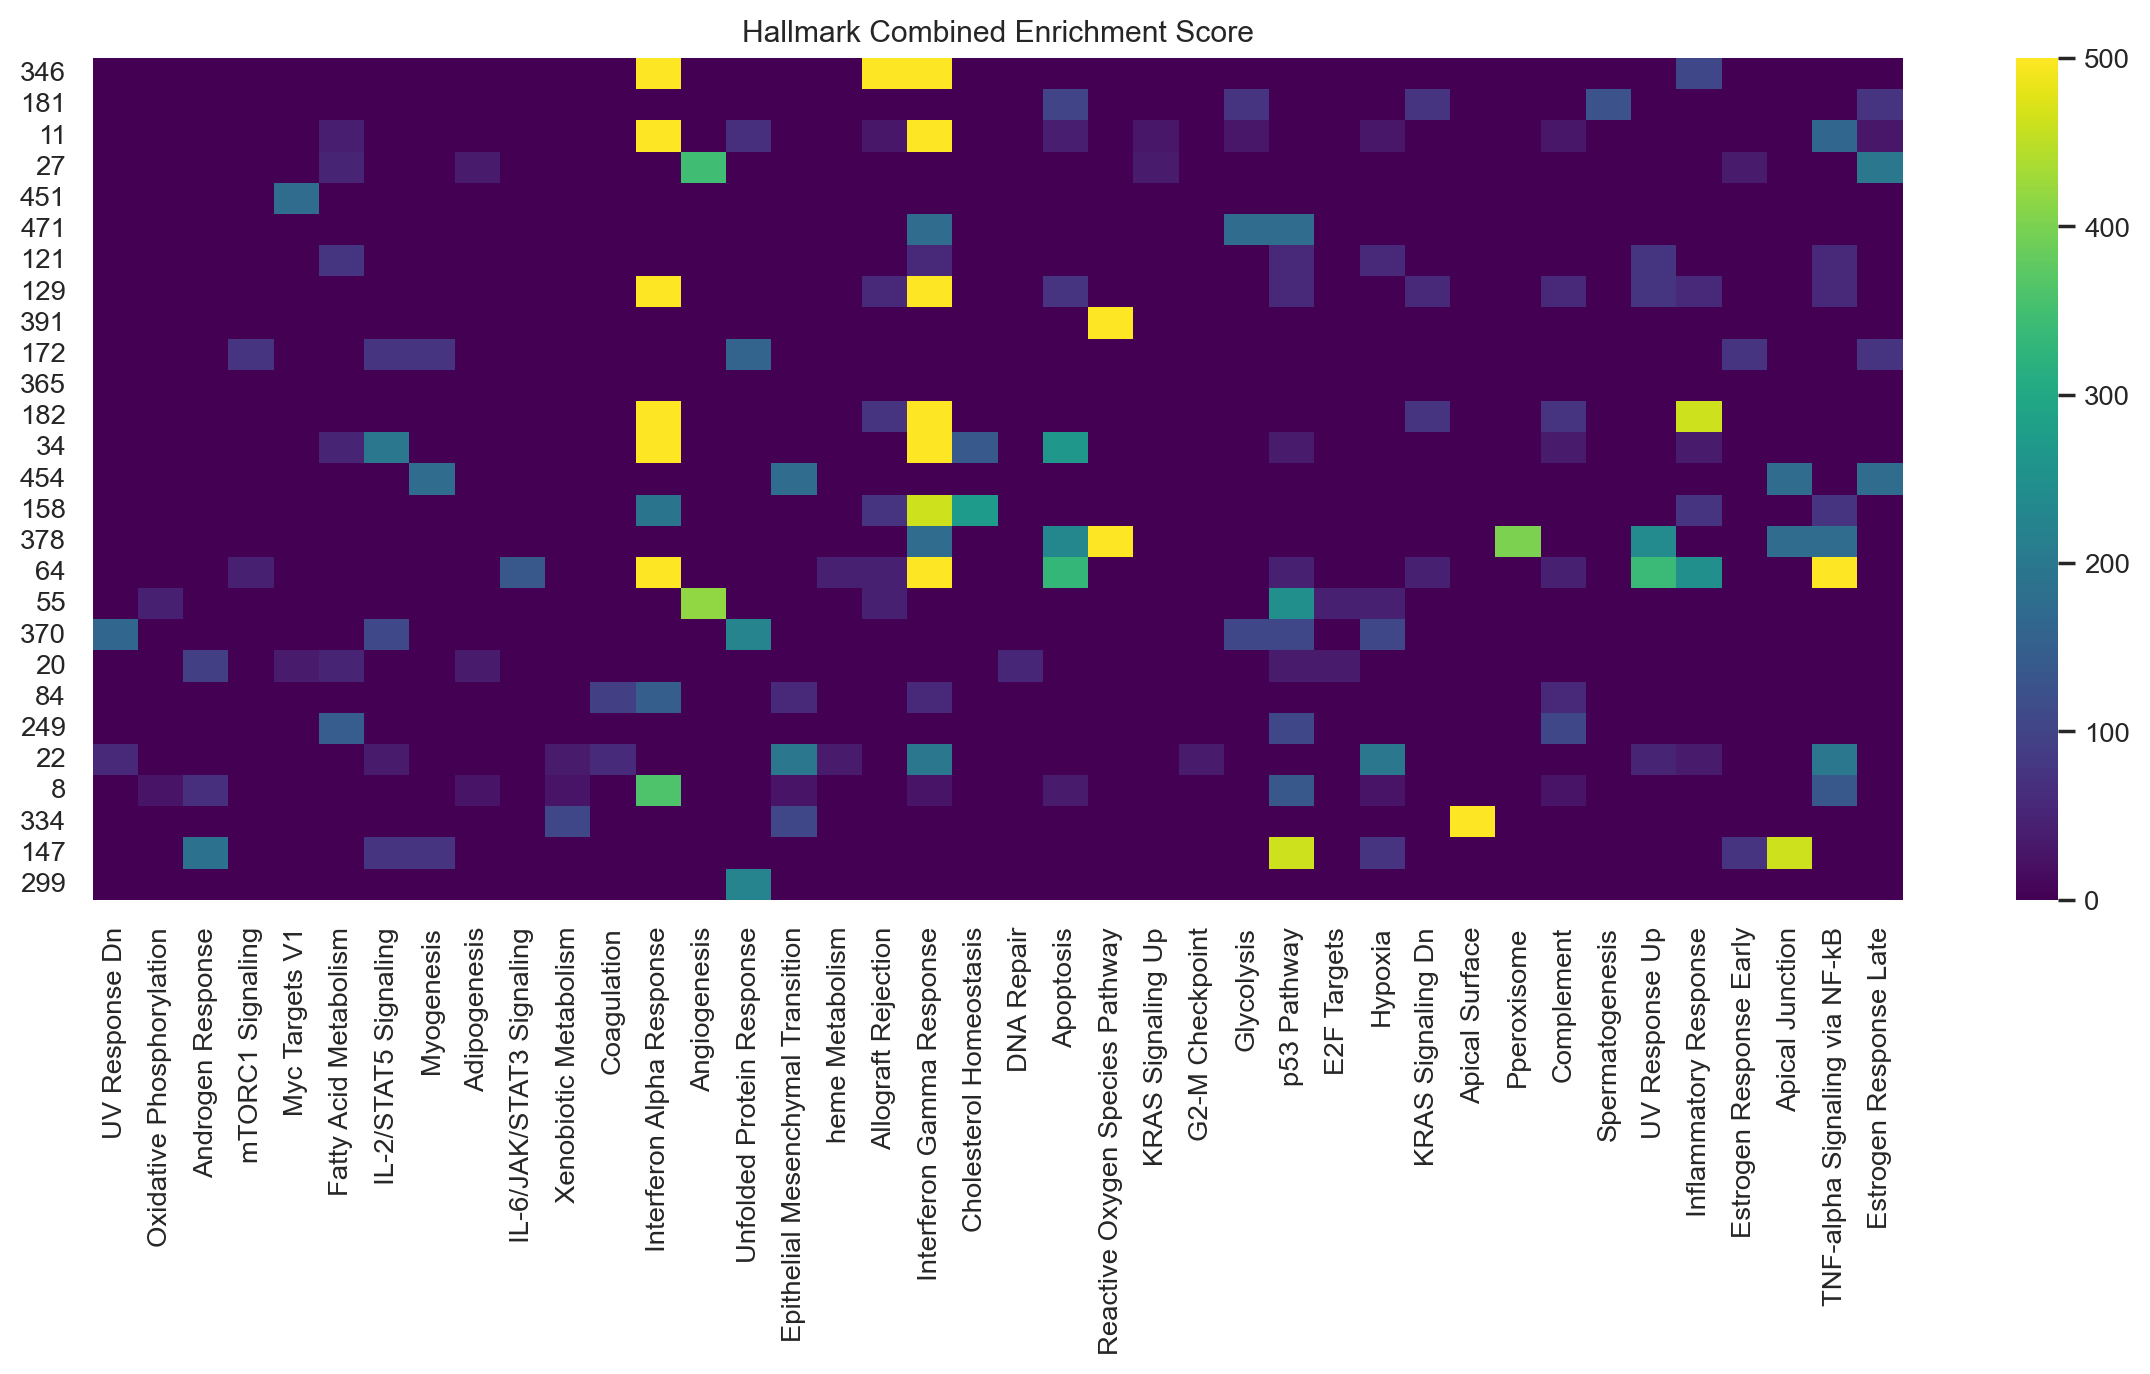

In [214]:
import pandas
sns.set(font_scale=0.9)
import gseapy as gp
enrc = collections.defaultdict(dict)
terms = set()
mgs = []
for mg, pats in mgs_down.items():
    genes = metagenes[mg]
    enr = gp.enrichr(gene_list=genes,
                     gene_sets=['MSigDB_Hallmark_2020'],
                     organism='Human', 
                     description='test_name',
                     outdir='test/enrichr_kegg',
                     cutoff=0.001 
                    )    
    mgs.append(mg)
    for x,y in zip(enr.res2d["Term"],enr.res2d["Combined Score"]):
        if y > 0:
            enrc[mg][x] = y
            terms.add(x)
mat = []
for term in terms:
    row = []
    for mg in mgs:
        if term in enrc[mg]:
            row.append(enrc[mg][term])
        else:
            row.append(0.0)
    mat.append(row)
df = pandas.DataFrame(numpy.array(mat),columns=mgs,index=list(terms)).T
fig, ax = plt.subplots(1,1,figsize=(12,7))
sns.heatmap(df,yticklabels=True,xticklabels=True,ax=ax, vmax=500,cmap="viridis")
ax.set_title("Hallmark Combined Enrichment Score")
fig.tight_layout()
plt.savefig("/Users/ceglian/bowel_to_adnexa.svg")

****
83
****


/Users/ceglian/miniconda3/lib/python3.9/site-packages/gseapy/enrichr.py:427: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)
2022-11-21 12:30:04,599 Warning: No enrich terms using library MSigDB_Hallmark_2020 when cutoff = 0.001


****
33
****


/Users/ceglian/miniconda3/lib/python3.9/site-packages/gseapy/enrichr.py:427: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)
2022-11-21 12:30:05,979 Warning: No enrich terms using library MSigDB_Hallmark_2020 when cutoff = 0.001


****
77
****


/Users/ceglian/miniconda3/lib/python3.9/site-packages/gseapy/enrichr.py:427: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)


****
57
****


/Users/ceglian/miniconda3/lib/python3.9/site-packages/gseapy/enrichr.py:427: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)
2022-11-21 12:30:08,859 Warning: No enrich terms using library MSigDB_Hallmark_2020 when cutoff = 0.001


****
51
****


/Users/ceglian/miniconda3/lib/python3.9/site-packages/gseapy/enrichr.py:427: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)
2022-11-21 12:30:10,324 Warning: No enrich terms using library MSigDB_Hallmark_2020 when cutoff = 0.001


[[0.0, 0.0, 0.0, 0.0, 330.92884130781977], [0.0, 0.0, 408.648679561366, 0.0, 58.76831842188268], [30.429226090981548, 0.0, 0.0, 25.93696464958489, 22.4431232477853], [0.0, 0.0, 30.429226090981548, 0.0, 0.0], [0.0, 0.0, 477.6544989202491, 0.0, 0.0], [0.0, 0.0, 94.2460773854509, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 22.4431232477853], [67.38449484604118, 0.0, 0.0, 0.0, 0.0], [0.0, 19.659557478207127, 0.0, 0.0, 0.0], [0.0, 0.0, 341.7935690237759, 0.0, 0.0], [66.58669547384002, 0.0, 0.0, 57.16235353894127, 49.80138528268159], [0.0, 0.0, 474.45791686900793, 0.0, 0.0], [30.429226090981548, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 30.429226090981548, 0.0, 0.0], [0.0, 0.0, 116.5335464845532, 100.4412761916998, 87.84191112168185], [0.0, 0.0, 0.0, 38.81936703082998, 0.0], [198.60131834764672, 133.68679532449664, 0.0, 0.0, 150.62793852241148], [0.0, 0.0, 633.2558791200636, 0.0, 0.0], [30.429226090981548, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 30.429226090981548, 25.93696464958489, 0.0], [162.17255858986445, 0.0, 0.0, 

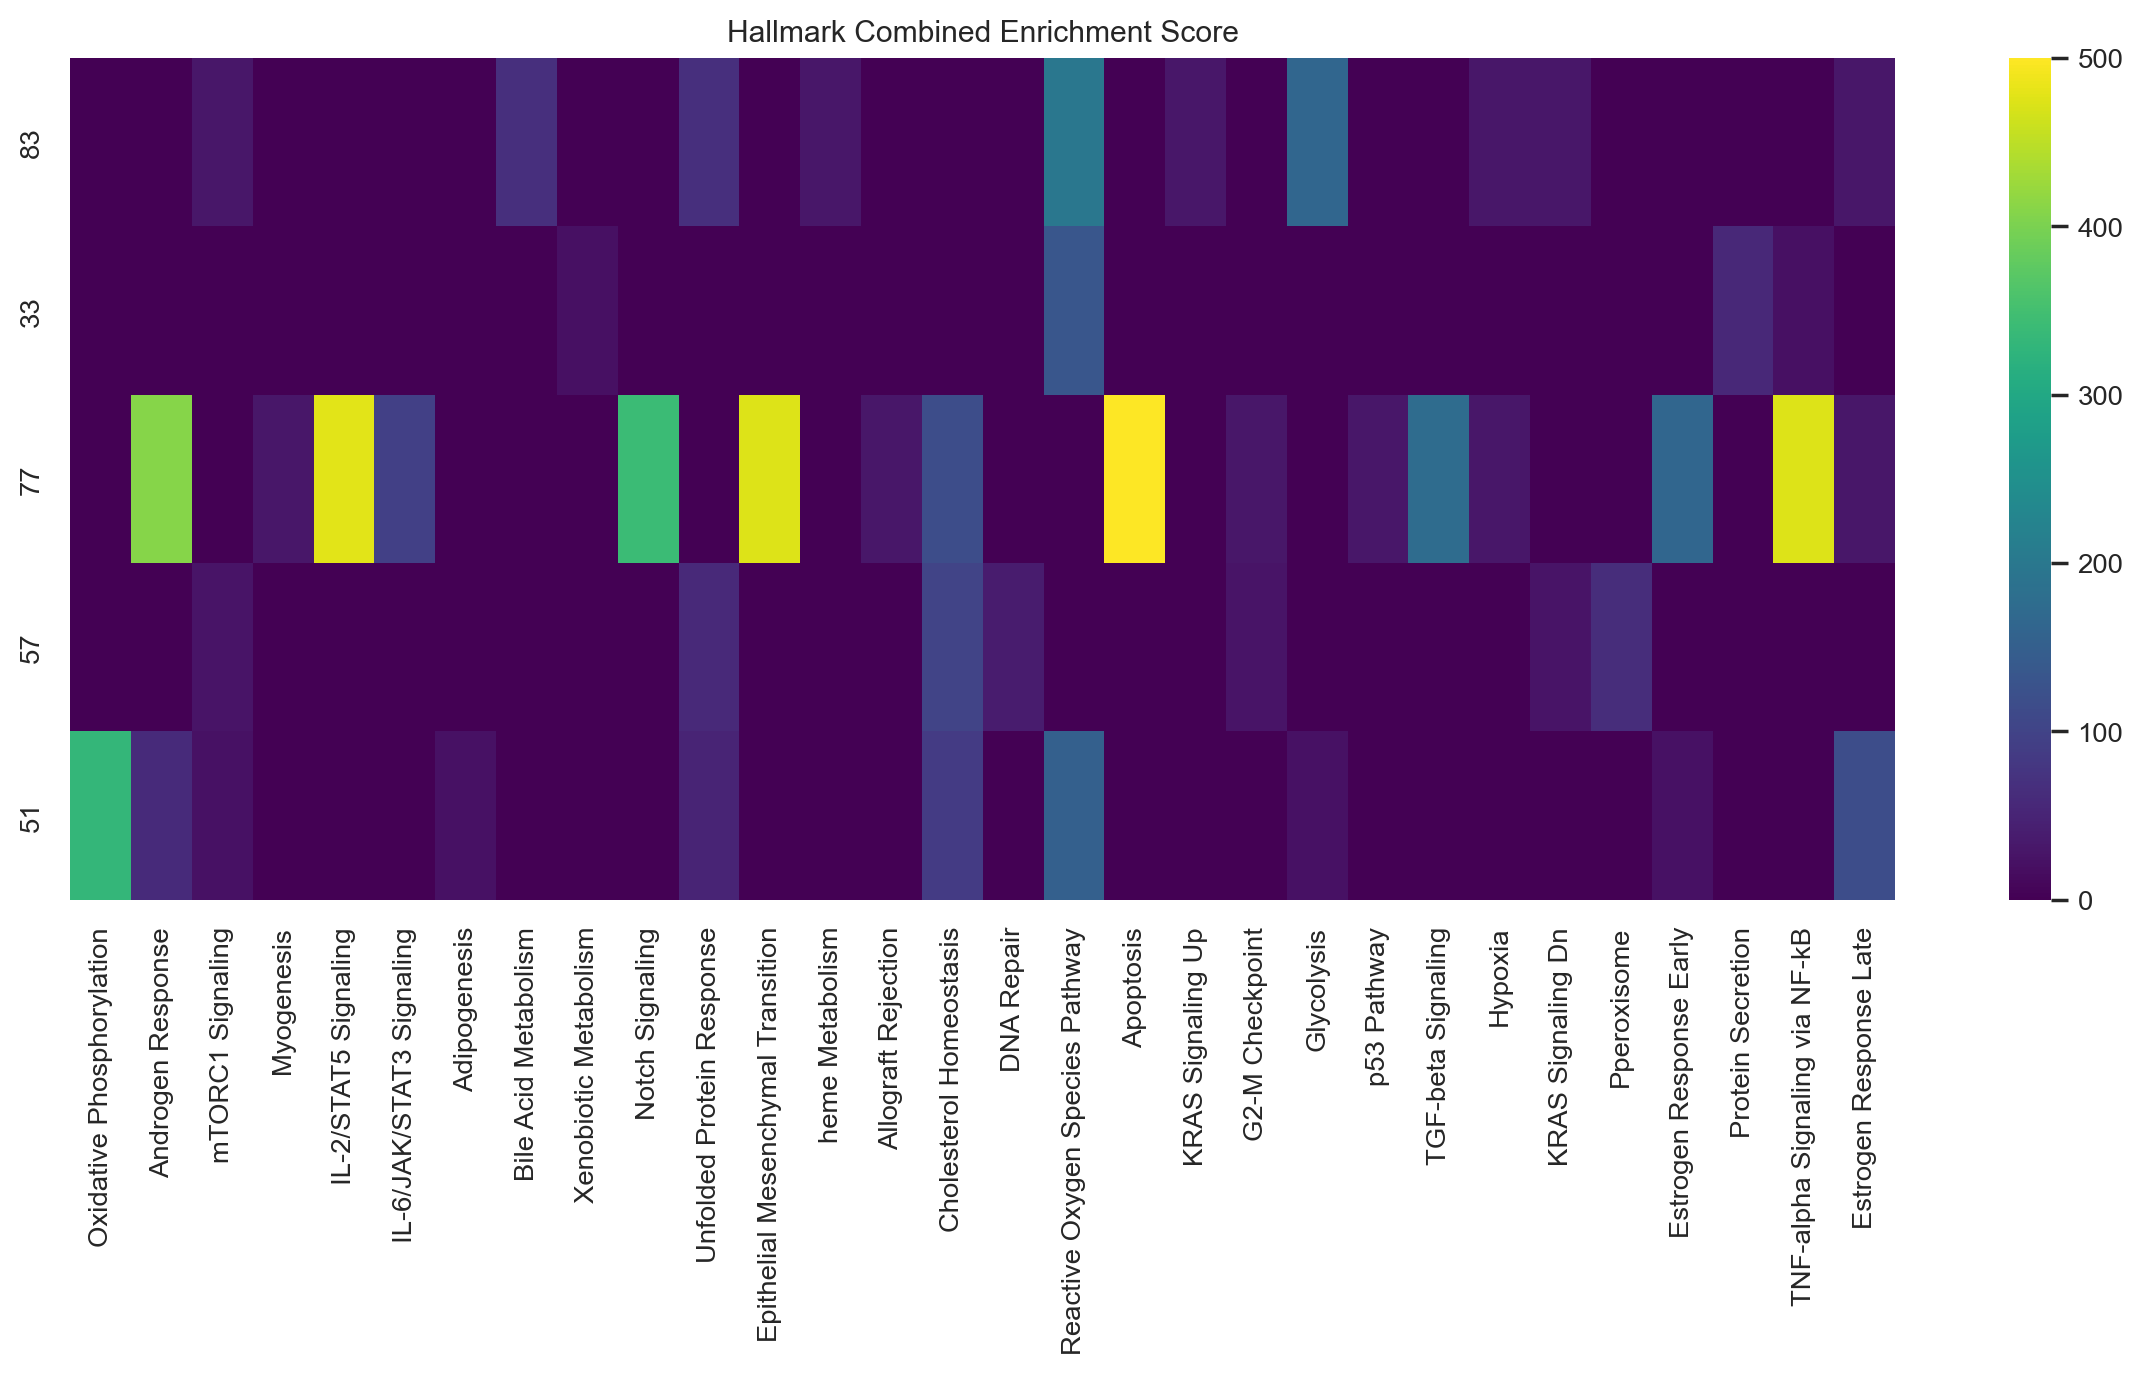

In [164]:
import pandas
sns.set(font_scale=0.9)
import gseapy as gp
enrc = collections.defaultdict(dict)
terms = set()
mgs = []
for mg, pats in mgs_up.items():
    genes = metagenes[mg]
    enr = gp.enrichr(gene_list=genes,
                     gene_sets=['MSigDB_Hallmark_2020'],
                     organism='Human', 
                     description='test_name',
                     outdir='test/enrichr_kegg',
                     cutoff=0.001 
                    )    
    mgs.append(mg)
    for x,y in zip(enr.res2d["Term"],enr.res2d["Combined Score"]):
        if y > 0:
            enrc[mg][x] = y
            terms.add(x)
mat = []
for term in terms:
    row = []
    for mg in mgs:
        if term in enrc[mg]:
            row.append(enrc[mg][term])
        else:
            row.append(0.0)
    mat.append(row)

df = pandas.DataFrame(numpy.array(mat),columns=mgs,index=list(terms)).T
fig, ax = plt.subplots(1,1,figsize=(12,7))
sns.heatmap(df,yticklabels=True,xticklabels=True,ax=ax, vmax=500,cmap="viridis")
ax.set_title("Hallmark Combined Enrichment Score")
fig.tight_layout()

In [167]:
for x in mgs_up.keys():
    print(metagenes[x])

['GALE', 'GCLM', 'VTCN1', 'SCARA3', 'CRACR2B', 'ERO1A', 'AHNAK2', 'GPRC5C', 'APOL1']
['S100A6', 'RPL35A', 'RPS23', 'TMSB4X', 'RPS4X', 'FTH1', 'CD63', 'RPL19', 'EIF1', 'RPS28', 'SPINT2', 'FTL']
['TACSTD2', 'CAPG', 'KLF10', 'NDRG1', 'NAPRT', 'CCND1', 'LMO7', 'TNFRSF12A', 'GADD45B']
['ITGB1BP1', 'HIST1H1C', 'SQLE', 'NUDT22', 'SORL1', 'NME3', 'HERPUD1', 'MAP1LC3B', 'SEC11C', 'KLK7']
['S100A11', 'SERP1', 'NDUFA4', 'BRI3', 'COX6C', 'NDUFB9', 'TXN', 'COX8A', 'PPP1R14B', 'KRT19', 'WFDC2']


In [168]:
for x in mgs_down.keys():
    print(metagenes[x])

['MMP23B', 'SMIM1', 'BDH1', 'LTC4S', 'DEFB1', 'GADD45G', 'CLIC3', 'SERPINA5', 'HSD17B1']
['PRKCI', 'SNHG8', 'C4ORF3', 'RNASET2', 'SARAF', 'CNPY2', 'BTG1', 'RPS27L', 'KRT10', 'RBCK1', 'MYDGF', 'TMEM205']
['IFI44L', 'CTSS', 'IFIH1', 'RTP4', 'SAMD9', 'DDX58', 'IRF7', 'IFIT3', 'IFIT1', 'OAS1', 'ISG20', 'IFI35', 'IL4I1', 'APOL6', 'APOL2']
['PSMB9', 'TAP1', 'TMOD1', 'IFITM1', 'XAF1', 'MX1']
['OSTC', 'SELENOP', 'MRPL21', 'GAS6', 'CKB', 'MRPL12', 'TXNL4A', 'BST2', 'FBL']
['ANKRD36C', 'MGST1', 'LRG1']
['HERC5', 'PITX1', 'GLDC', 'SLC43A3', 'POU2F3', 'IFIT2', 'CCNA1', 'HAPLN3', 'CD40']
['S100A10', 'S100A16', 'S100A14', 'HSPA1A', 'HSPA1B', 'HLA-DRA', 'HLA-DRB1', 'HEBP2', 'GABARAPL2', 'MUC16', 'XBP1']
['ISG15', 'CHI3L1', 'BTG2', 'PARP14', 'RPL22L1', 'IRF1', 'CCDC85B', 'TNFAIP2', 'LGALS1']
['IFI6', 'GBP1', 'TXNIP', 'CD55', 'PLSCR1', 'TNFSF10', 'IFITM2', 'UBE2L6', 'RARRES3', 'VIM', 'PDLIM1', 'H1F0']
['ZFP36L2', 'CP', 'TM4SF1', 'NDUFB5', 'CD74', 'HLA-A', 'HLA-C', 'HLA-B', 'SAT1', 'CLU', 'CEBPD', 'TUBB

In [175]:
import pandas
sns.set(font_scale=0.9)
import gseapy as gp
enrc = collections.defaultdict(dict)
terms = set()
mgs = []
for mg, pats in mgs_up.items():
    genes = metagenes[mg]
    enr = gp.enrichr(gene_list=genes,
                     gene_sets=['MSigDB_Hallmark_2020'],
                     organism='Human', 
                     description='test_name',
                     outdir='test/enrichr_kegg',
                     cutoff=0.001 
                    )    
    mgs.append(mg)
    for x,y in zip(enr.res2d["Term"],enr.res2d["Combined Score"]):
        if y > 0:
            enrc[mg][x] = y
            terms.add(x)
mat = []
for term in terms:
    row = []
    for mg in mgs:
        if term in enrc[mg]:
            row.append(enrc[mg][term])
        else:
            row.append(0.0)
    mat.append(row)
print(mat)
df = pandas.DataFrame(numpy.array(mat),columns=mgs,index=list(terms)).T
fig, ax = plt.subplots(1,1,figsize=(12,7))
sns.heatmap(df,yticklabels=True,xticklabels=True,ax=ax, vmax=500,cmap="viridis")
ax.set_title("Hallmark Combined Enrichment Score")
fig.tight_layout()

Exception: Error analyzing gene list

ADNEXA
BOWEL
98 0.40278076308539934 ['WNT7A', 'CLDN1', 'LIMCH1', 'PLK2', 'PXDC1', 'MACC1', 'IGFBP3', 'TSPAN12', 'RAC3']
256 0.3902935968193999 ['CYTOR', 'RAI14', 'FAM107B', 'CREM', 'LARP6']
270 0.38482090956795934 ['LAMC2', 'LAMB3', 'TMPRSS4', 'KRT17', 'TSHZ2']
168 0.35331777908089723 ['FBXO2', 'SNHG12', 'CITED2', 'TCIM', 'FADS3', 'RHOF', 'CAVIN1']
5 0.34777678026577186 ['UBE2T', 'LBR', 'ECT2', 'MAD2L1', 'CCNB1', 'DHFR', 'LMNB1', 'PTTG1', 'EZH2', 'FAM111A', 'FEN1', 'KIF20B', 'HELLS', 'NCAPD2', 'TPX2']
275 0.34235414903681416 ['ERRFI1', 'CLIC5', 'CRYAB', 'SVIL', 'SPOCK2']
158 0.33835146668925264 ['S100A2', 'CDH6', 'DCDC2', 'UPK3B', 'RHOD', 'EMP1', 'COL1A1']
305 0.3374930751635902 ['CKS1B', 'SPON1', 'TUBA1C', 'JPT1']
315 0.3324903038470448 ['HMGCS1', 'MAFG', 'LDLR', 'SELENOM']
35 0.33225258936619717 ['DNAJC19', 'POLR2H', 'OCIAD2', 'KDELR2', 'PDIA4', 'PRDX4', 'TIMP1', 'NFKBIA', 'SELENOS', 'MT2A', 'NME1']
211 0.3318336076331402 ['PLOD1', 'C1ORF21', 'CCDC88A', 'HES6', 'XXYLT1', 'FSCN1']
179

/Users/ceglian/miniconda3/lib/python3.9/site-packages/gseapy/enrichr.py:427: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)
2022-11-21 10:05:14,737 Warning: No enrich terms using library MSigDB_Hallmark_2020 when cutoff = 0.001
/Users/ceglian/miniconda3/lib/python3.9/site-packages/gseapy/enrichr.py:427: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)
2022-11-21 10:05:16,494 Warning: No enrich terms using library MSigDB_Hallmark_2020 when cutoff = 0.001
/Users/ceglian/miniconda3/lib/python3.9/site-packages/gseapy/enrichr.py:427: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res

[[0.0, 0.0, 0.0, 69.6183410331835, 0.0, 0.0, 69.6183410331835, 0.0, 164.66043385202047, 0.0, 0.0, 69.6183410331835, 0.0, 31.387889738679515, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 262.5773759432504, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 13.963876250165317, 0.0, 0.0, 0.0, 743.6058797881194, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 13.963876250165317, 0.0, 0.0, 0.0, 0.0, 117.00004466783103, 0.0, 0.0, 0.0, 0.0, 0.0], [30.429226090981548, 0.0, 0.0, 0.0, 0.0, 462.1028413784856, 44.57906348265406, 0.0, 0.0, 0.0, 0.0, 44.57906348265406, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 44.88750406424524, 0.0, 0.0, 0.0, 0.0, 44.88750406424524, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 146.00778835295287, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 44.57906348265406, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 44.57906348265406, 0.0, 19.659557478207127, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 22.4431232477853, 56.46591775214154, 0.0, 0.0, 0.0, 

/Users/ceglian/miniconda3/lib/python3.9/site-packages/gseapy/enrichr.py:427: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)
2022-11-21 10:05:40,624 Warning: No enrich terms using library MSigDB_Hallmark_2020 when cutoff = 0.001
/Users/ceglian/miniconda3/lib/python3.9/site-packages/gseapy/enrichr.py:427: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)
2022-11-21 10:05:42,321 Warning: No enrich terms using library MSigDB_Hallmark_2020 when cutoff = 0.001
/Users/ceglian/miniconda3/lib/python3.9/site-packages/gseapy/enrichr.py:427: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res

[[0.0, 0.0, 0.0, 35.68686578929854, 0.0, 0.0, 47.97160424211999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 15.529145947074284, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 22.4431232477853, 0.0, 0.0, 330.92884130781977, 0.0], [0.0, 41.58695944336839, 0.0, 0.0, 0.0, 92.8967850071638, 0.0, 0.0, 0.0, 422.54790984855, 0.0, 0.0, 0.0, 58.76831842188268, 0.0], [0.0, 0.0, 0.0, 22.4431232477853, 0.0, 0.0, 0.0, 0.0, 25.93696464958489, 0.0, 0.0, 44.57906348265406, 326.6206097208578, 22.4431232477853, 36.38152974515558], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 63.10618119534448, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 15.529145947074284, 107.23606056102832, 0.0, 0.0, 36.38152974515558, 0.0, 0.0, 25.93696464958489, 0.0, 22.4431232477853, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 198.70769409839335, 30.64460639331933, 0.0, 0.0, 176.0657892808416, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 111.53906016025832, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 15.529145947074284, 0.0, 0.0

KeyError: 'ADNEXA'

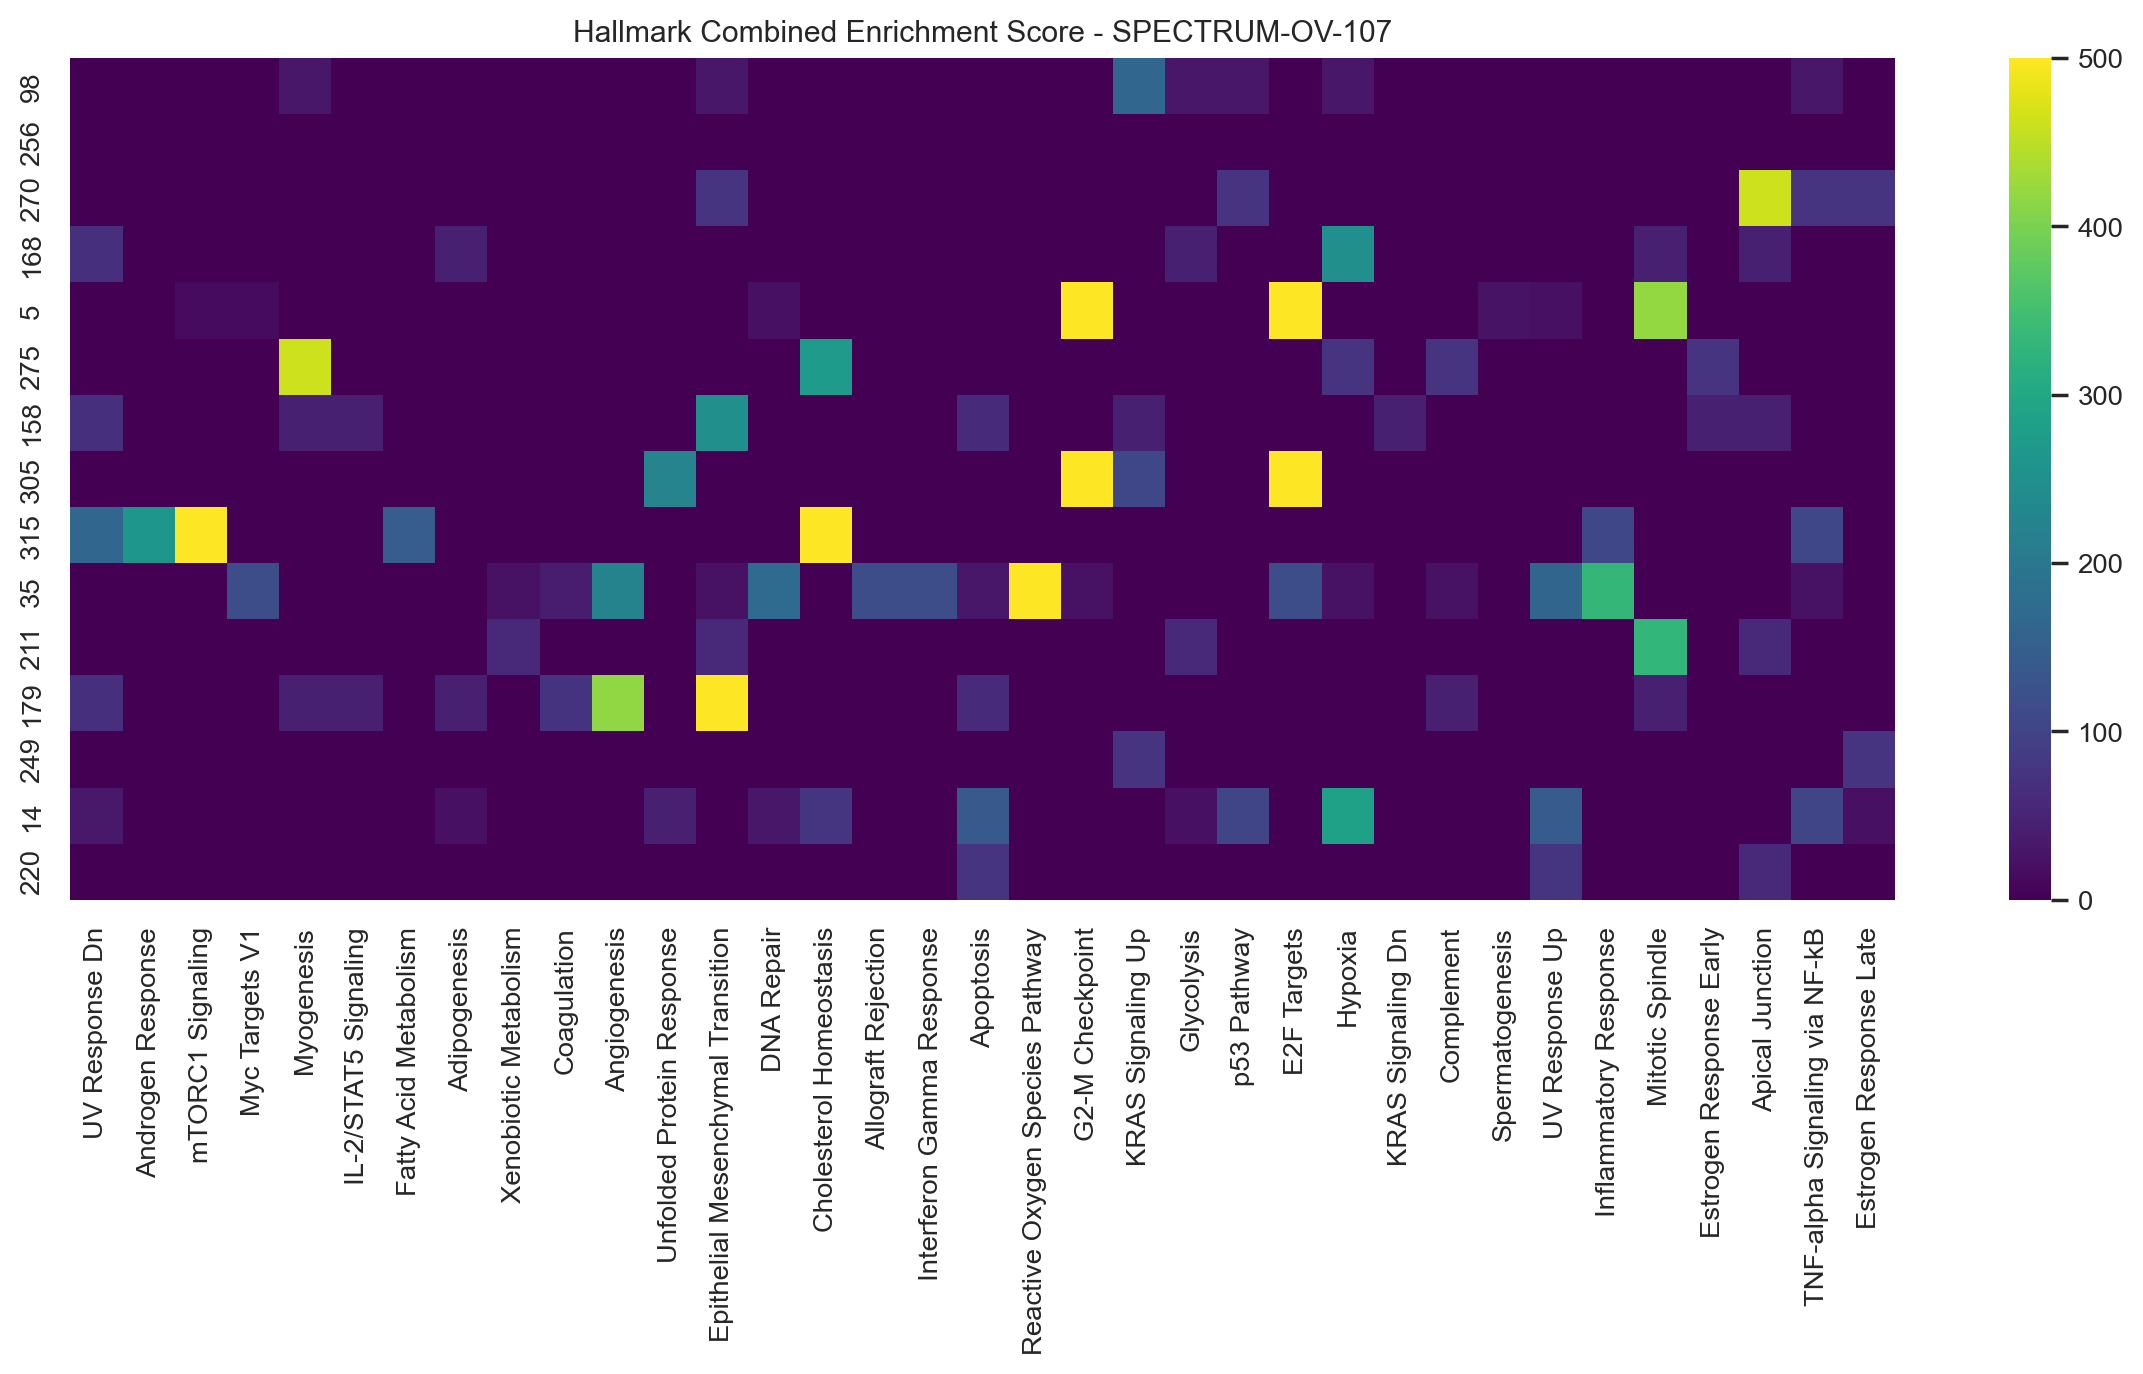

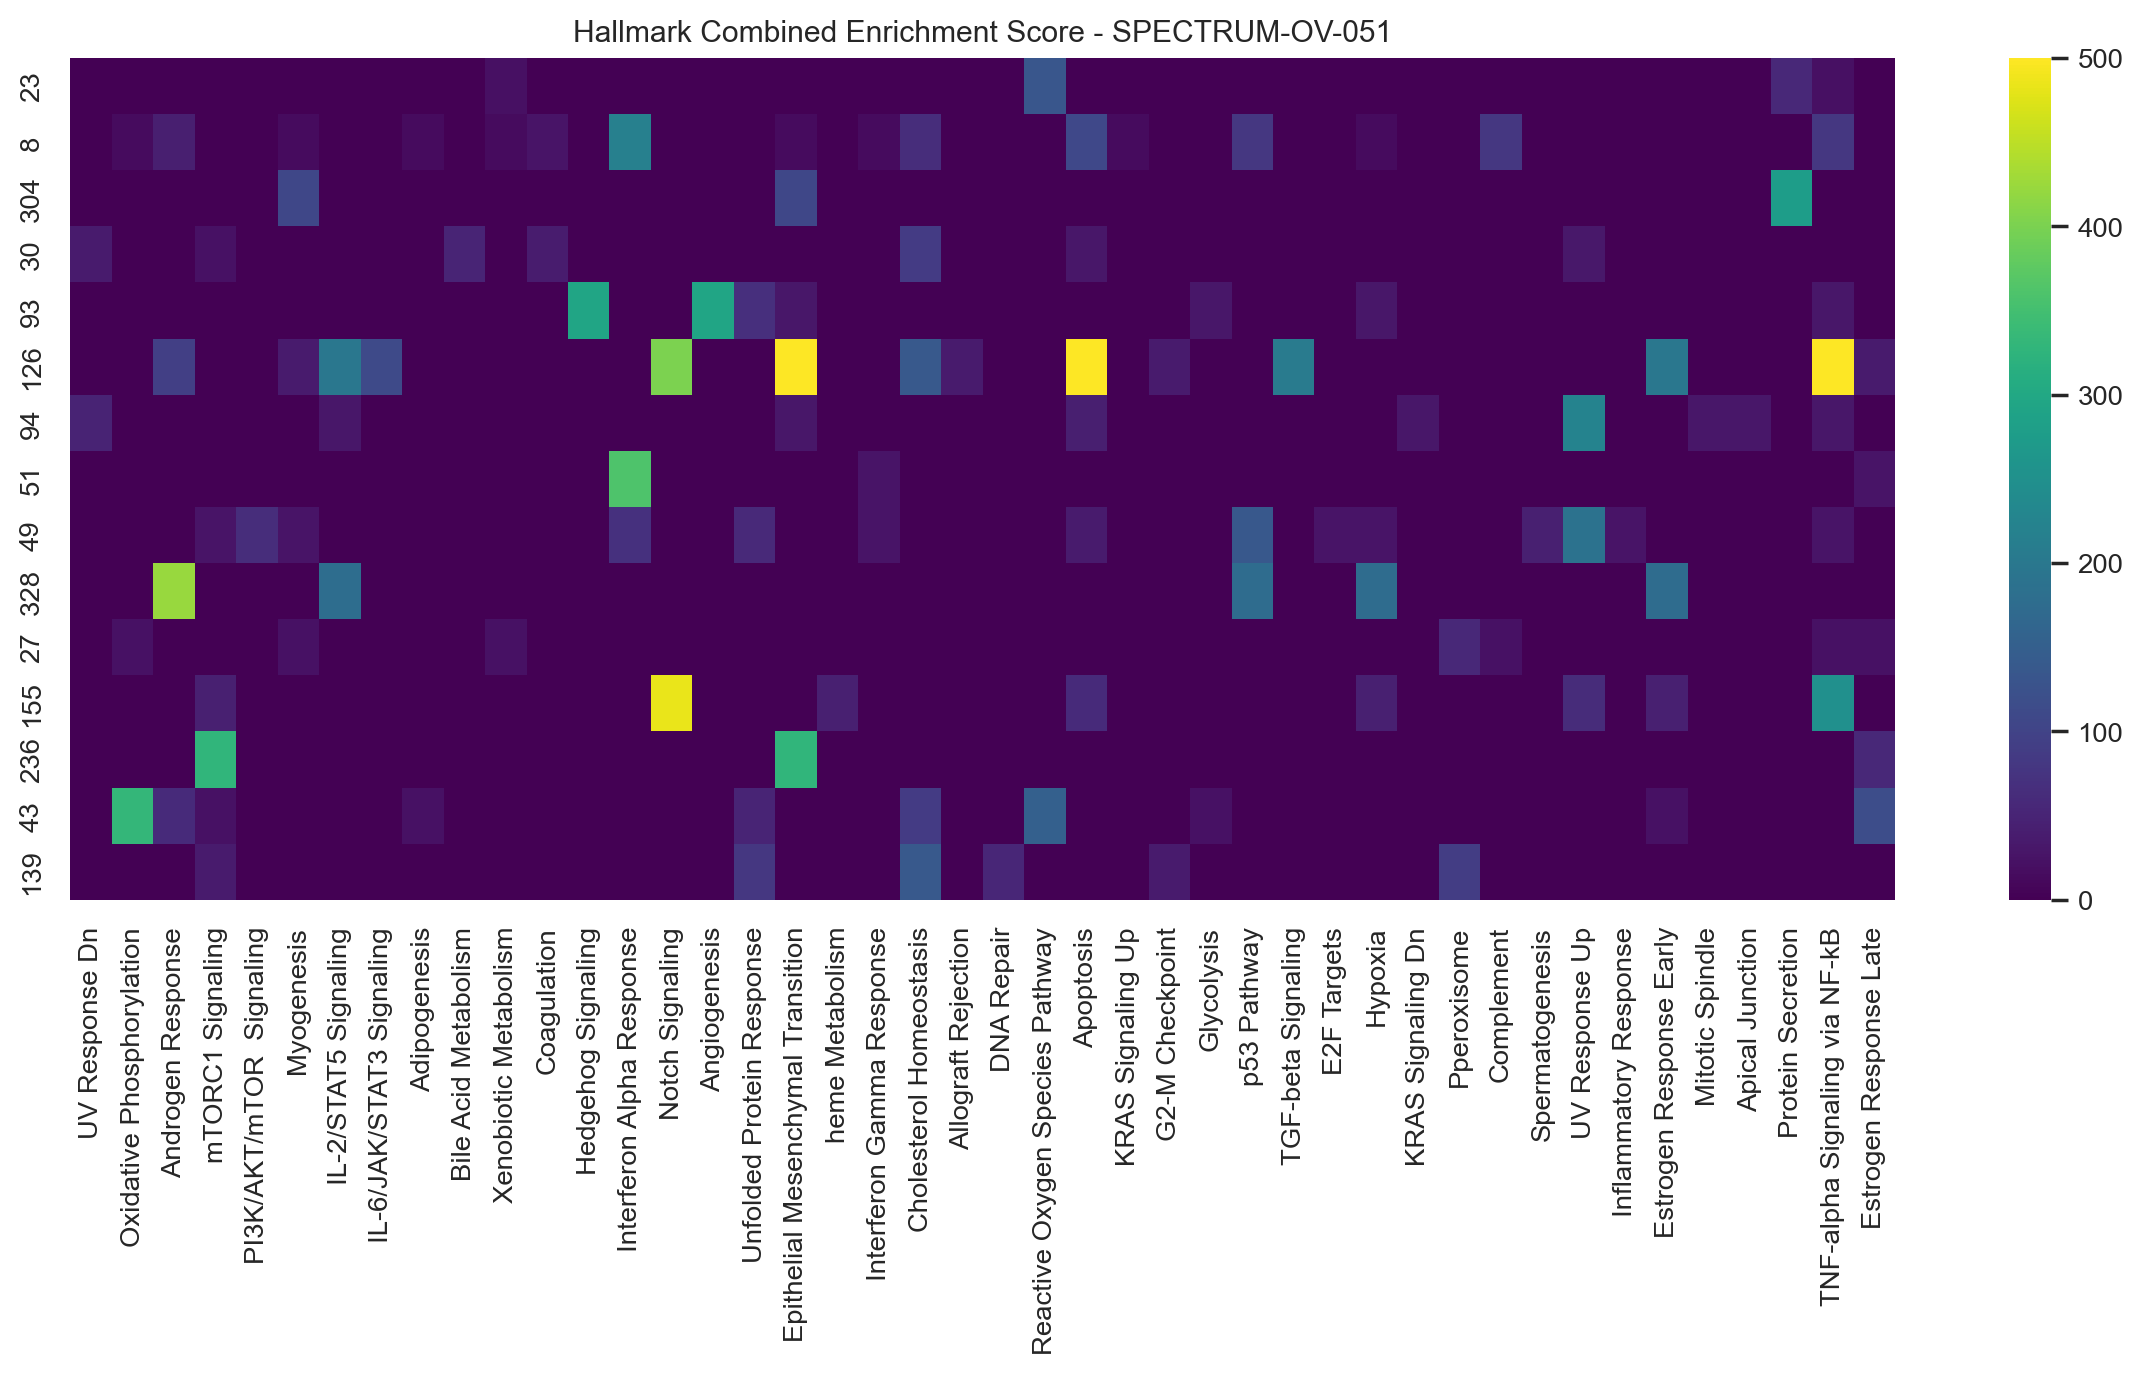

In [116]:
import matplotlib.pyplot as plt
import collections
import numpy
import seaborn as sns
import pandas
sns.set(font_scale=0.9)
import gseapy as gp
for p in set(adata.obs["patient"]):
    sub = adata[adata.obs["patient"]==p]
    mapped_components = dict(zip(list(cembed.data.keys()),cembed.matrix))
    comps = collections.defaultdict(list)
    for bc,x in zip(sub.obs.index,sub.obs["site"]):
        comps[x].append(mapped_components[bc])
    vectors = dict()
    mean_vecs = []
    for x, vec in comps.items():
        print(x)
        ovecs = []
        vec = numpy.mean(vec,axis=0)
        for oph, ovec in comps.items():
            for o in ovec:
                ovecs.append(o)
        aovec = numpy.average(ovecs,axis=0)
        vector = numpy.subtract(vec,aovec)
        vector = numpy.subtract(vector,cembed.dataset_vector)
        vectors[x] = vector
    res = numpy.subtract(vectors["BOWEL"],vectors["ADNEXA"])
    mgs_up = dict()
    distances = dict()
    for mg, genes in metagenes.items():
        mgvec = embed.generate_vector(genes)
        dist = 1.0 - distance.cosine(res,mgvec)
        distances[mg] = dist
    sorted_x = list(reversed(sorted(distances.items(), key=lambda kv: kv[1])))
    for mg, dist in sorted_x[:15]:
        print(mg, dist, metagenes[mg])
        mgs_up[mg] = metagenes[mg]

    enrc = collections.defaultdict(dict)
    terms = set()
    mgs = []
    for mg, genes in mgs_up.items():
        enr = gp.enrichr(gene_list=genes,
                        gene_sets=['MSigDB_Hallmark_2020'],
                        organism='Human', 
                        description='test_name',
                        outdir='test/enrichr_kegg',
                        cutoff=0.001 
                        )    
        mgs.append(mg)
        for x,y in zip(enr.res2d["Term"],enr.res2d["Combined Score"]):
            if y > 0:
                enrc[mg][x] = y
                terms.add(x)
    mat = []
    for term in terms:
        row = []
        for mg in mgs:
            if term in enrc[mg]:
                row.append(enrc[mg][term])
            else:
                row.append(0.0)
        mat.append(row)
    print(mat)
    df = pandas.DataFrame(numpy.array(mat),columns=mgs,index=list(terms)).T
    fig, ax = plt.subplots(1,1,figsize=(12,7))
    sns.heatmap(df,yticklabels=True,xticklabels=True,ax=ax, vmax=500,cmap="viridis")
    ax.set_title("Hallmark Combined Enrichment Score - {}".format(p))
    fig.tight_layout()
    # plt.savefig("/Users/ceglian/bowel_to_adnexa.svg")

# Find Metagenes similar to Adnexa - Bowel (Vector Arithmetic)

In [93]:
from scipy.spatial import distance
res = numpy.subtract(vectors["ADNEXA"],vectors["BOWEL"])
mgs_down = dict()
distances = dict()
for mg, genes in metagenes.items():
    mgvec = embed.generate_vector(genes)
    dist = 1.0 - distance.cosine(res,mgvec)
    distances[mg] = dist
sorted_x = list(reversed(sorted(distances.items(), key=lambda kv: kv[1])))
for mg, dist in sorted_x[:15]:
    print(mg, dist, metagenes[mg])
    mgs_down[mg] = metagenes[mg]

28 0.4383042719930005 ['TNNC1', 'IMPG2', 'FST', 'FAM83A', 'SCGB1D1', 'COLCA1', 'AKR1C3', 'NRP1', 'CRTAC1', 'CEMIP', 'MMP2', 'MT1H']
13 0.38079793019130537 ['SAMD11', 'ID3', 'CSRNP3', 'FRZB', 'IQGAP2', 'NR2F1', 'RSPO3', 'PCOLCE', 'PRSS1', 'TMEM47', 'EGR3', 'LGR5', 'SCG5', 'SMTN']
150 0.3801943715961622 ['FOXC1', 'TLE4', 'COL27A1', 'OBP2A', 'MYRF', 'SLC16A9', 'CPM', 'TPPP3']
100 0.3779617059620677 ['MMP23B', 'SMIM1', 'BDH1', 'LTC4S', 'DEFB1', 'GADD45G', 'CLIC3', 'SERPINA5', 'HSD17B1']
273 0.3682956157864621 ['ESPN', 'NAPEPLD', 'EGFL6', 'GAS1', 'PTGDS']
2 0.3466564840639881 ['ETV5', 'FOXQ1', 'PNOC', 'MAPK15', 'RGS3', 'CRB2', 'FZD4', 'ITIH5', 'SNRPN', 'CRABP1', 'CRNDE', 'EPN3', 'GATA6', 'TFAP2C', 'SOX18', 'PCP4']
114 0.3423747954731109 ['EDN2', 'RGS16', 'TGFB2', 'SOX11', 'TMEM45A', 'SLC26A7', 'ACTA2', 'NXPH4', 'OLFM2']
33 0.3407046522039263 ['S100A6', 'RPL35A', 'RPS23', 'TMSB4X', 'RPS4X', 'FTH1', 'CD63', 'RPL19', 'EIF1', 'RPS28', 'SPINT2', 'FTL']
29 0.3395318091269093 ['PHGDH', 'KLHDC3', '

# Find Metagenes similar to Bowel - Adnexa

In [94]:
from scipy.spatial import distance
res = numpy.subtract(vectors["BOWEL"],vectors["ADNEXA"])
mgs_up = dict()
distances = dict()
for mg, genes in metagenes.items():
    mgvec = embed.generate_vector(genes)
    dist = 1.0 - distance.cosine(res,mgvec)
    distances[mg] = dist
sorted_x = list(reversed(sorted(distances.items(), key=lambda kv: kv[1])))
for mg, dist in sorted_x[:15]:
    print(mg, dist, metagenes[mg])
    mgs_up[mg] = metagenes[mg]

153 0.12291832069810082 ['G0S2', 'SPTSSB', 'PPBP', 'MIR3945HG', 'FGF19', 'KRT4', 'MEDAG']
140 0.11732724676477435 ['ITLN1', 'CALCRL', 'C2ORF83', 'TRIM55', 'OBP2B', 'SPAG6', 'IGFL1', 'IGLC3']
90 0.11315519757252568 ['GJA5', 'RGS4', 'FGG', 'IRX1', 'CYP2W1', 'HEMGN', 'AK7', 'EVI2B', 'LRRC46']
66 0.0995803869475882 ['COL11A1', 'FCER1A', 'CCDC74B', 'ACKR3', 'CAMP', 'HHIP', 'GIMAP7', 'FAM30A', 'MARCH10', 'DNAH17']
312 0.09751687230575068 ['MLLT11', 'HECW1', 'GAS2L2']
69 0.09440792467588299 ['CD1E', 'POMC', 'IL1RL1', 'FRG2C', 'LAMP3', 'HEPACAM2', 'IGHA1', 'BPIFB1', 'CD177', 'ADAMTS5']
242 0.09275869022881955 ['CD38', 'NEUROG2', 'ATP10B', 'GCM2', 'MYL2', 'KRT38']
185 0.09079623827440475 ['COL3A1', 'FN1', 'NEDD9', 'CPVL', 'CTHRC1', 'COL4A1', 'COL6A1']
251 0.09023616741054308 ['IL1B', 'PLAC8', 'MUC6', 'MMP13', 'TFF1']
111 0.08725263478567757 ['MNDA', 'NEK10', 'ROPN1B', 'FGB', 'TGFBI', 'PDGFRB', 'CA1', 'FGF3', 'GLDN']
283 0.08667017317214598 ['CARMN', 'CRIP3', 'OLFM1', 'SERPINA6']
163 0.085363634

In [95]:
for mg, genes in metagenes.items():
    if "HLA-B" in genes:
        print(mg, genes)

4 ['ZFP36L2', 'CP', 'TM4SF1', 'NDUFB5', 'CD74', 'HLA-A', 'HLA-C', 'HLA-B', 'SAT1', 'CLU', 'CEBPD', 'TUBB4B', 'FOLR1', 'KRT7', 'IFI27', 'DDT']


In [83]:
embed.compute_similarities("HLA-DPA1")

,Gene,Similarity
0,HLA-DPA1,1.000000
1,HLA-DMA,0.924938
2,HLA-DPB1,0.874950
3,SRD5A3,0.839139
4,PSMB9,0.836300
...,...,...
2495,CPXM2,-0.085160
2496,PLPPR3,-0.086211
2497,TMPRSS11E,-0.086467
2498,PIP,-0.090568


# GSEA Enrichment of Metagenes

/Users/ceglian/miniconda3/lib/python3.9/site-packages/gseapy/enrichr.py:427: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)
2022-11-15 14:26:00,606 Warning: No enrich terms using library MSigDB_Hallmark_2020 when cutoff = 0.001
/Users/ceglian/miniconda3/lib/python3.9/site-packages/gseapy/enrichr.py:427: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)
2022-11-15 14:26:02,015 Warning: No enrich terms using library MSigDB_Hallmark_2020 when cutoff = 0.001
/Users/ceglian/miniconda3/lib/python3.9/site-packages/gseapy/enrichr.py:427: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res

[[74.99696447567176, 0.0, 0.0, 0.0, 0.0], [0.0, 44.57906348265406, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 107.23606056102832], [0.0, 0.0, 0.0, 0.0, 107.23606056102832], [0.0, 44.57906348265406, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 142.48049039348678], [0.0, 0.0, 0.0, 520.1672581812571, 0.0], [0.0, 0.0, 44.57906348265406, 0.0, 0.0], [160.62412864511748, 0.0, 0.0, 0.0, 0.0], [0.0, 44.57906348265406, 0.0, 0.0, 107.23606056102832], [0.0, 0.0, 0.0, 743.6058797881194, 0.0], [0.0, 0.0, 0.0, 107.94766526273892, 0.0], [0.0, 0.0, 0.0, 107.23606056102832, 0.0], [0.0, 0.0, 0.0, 107.23606056102832, 0.0], [0.0, 107.13020583222142, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 743.6058797881194, 0.0], [0.0, 135.20432722805478, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 107.23606056102832, 0.0]]


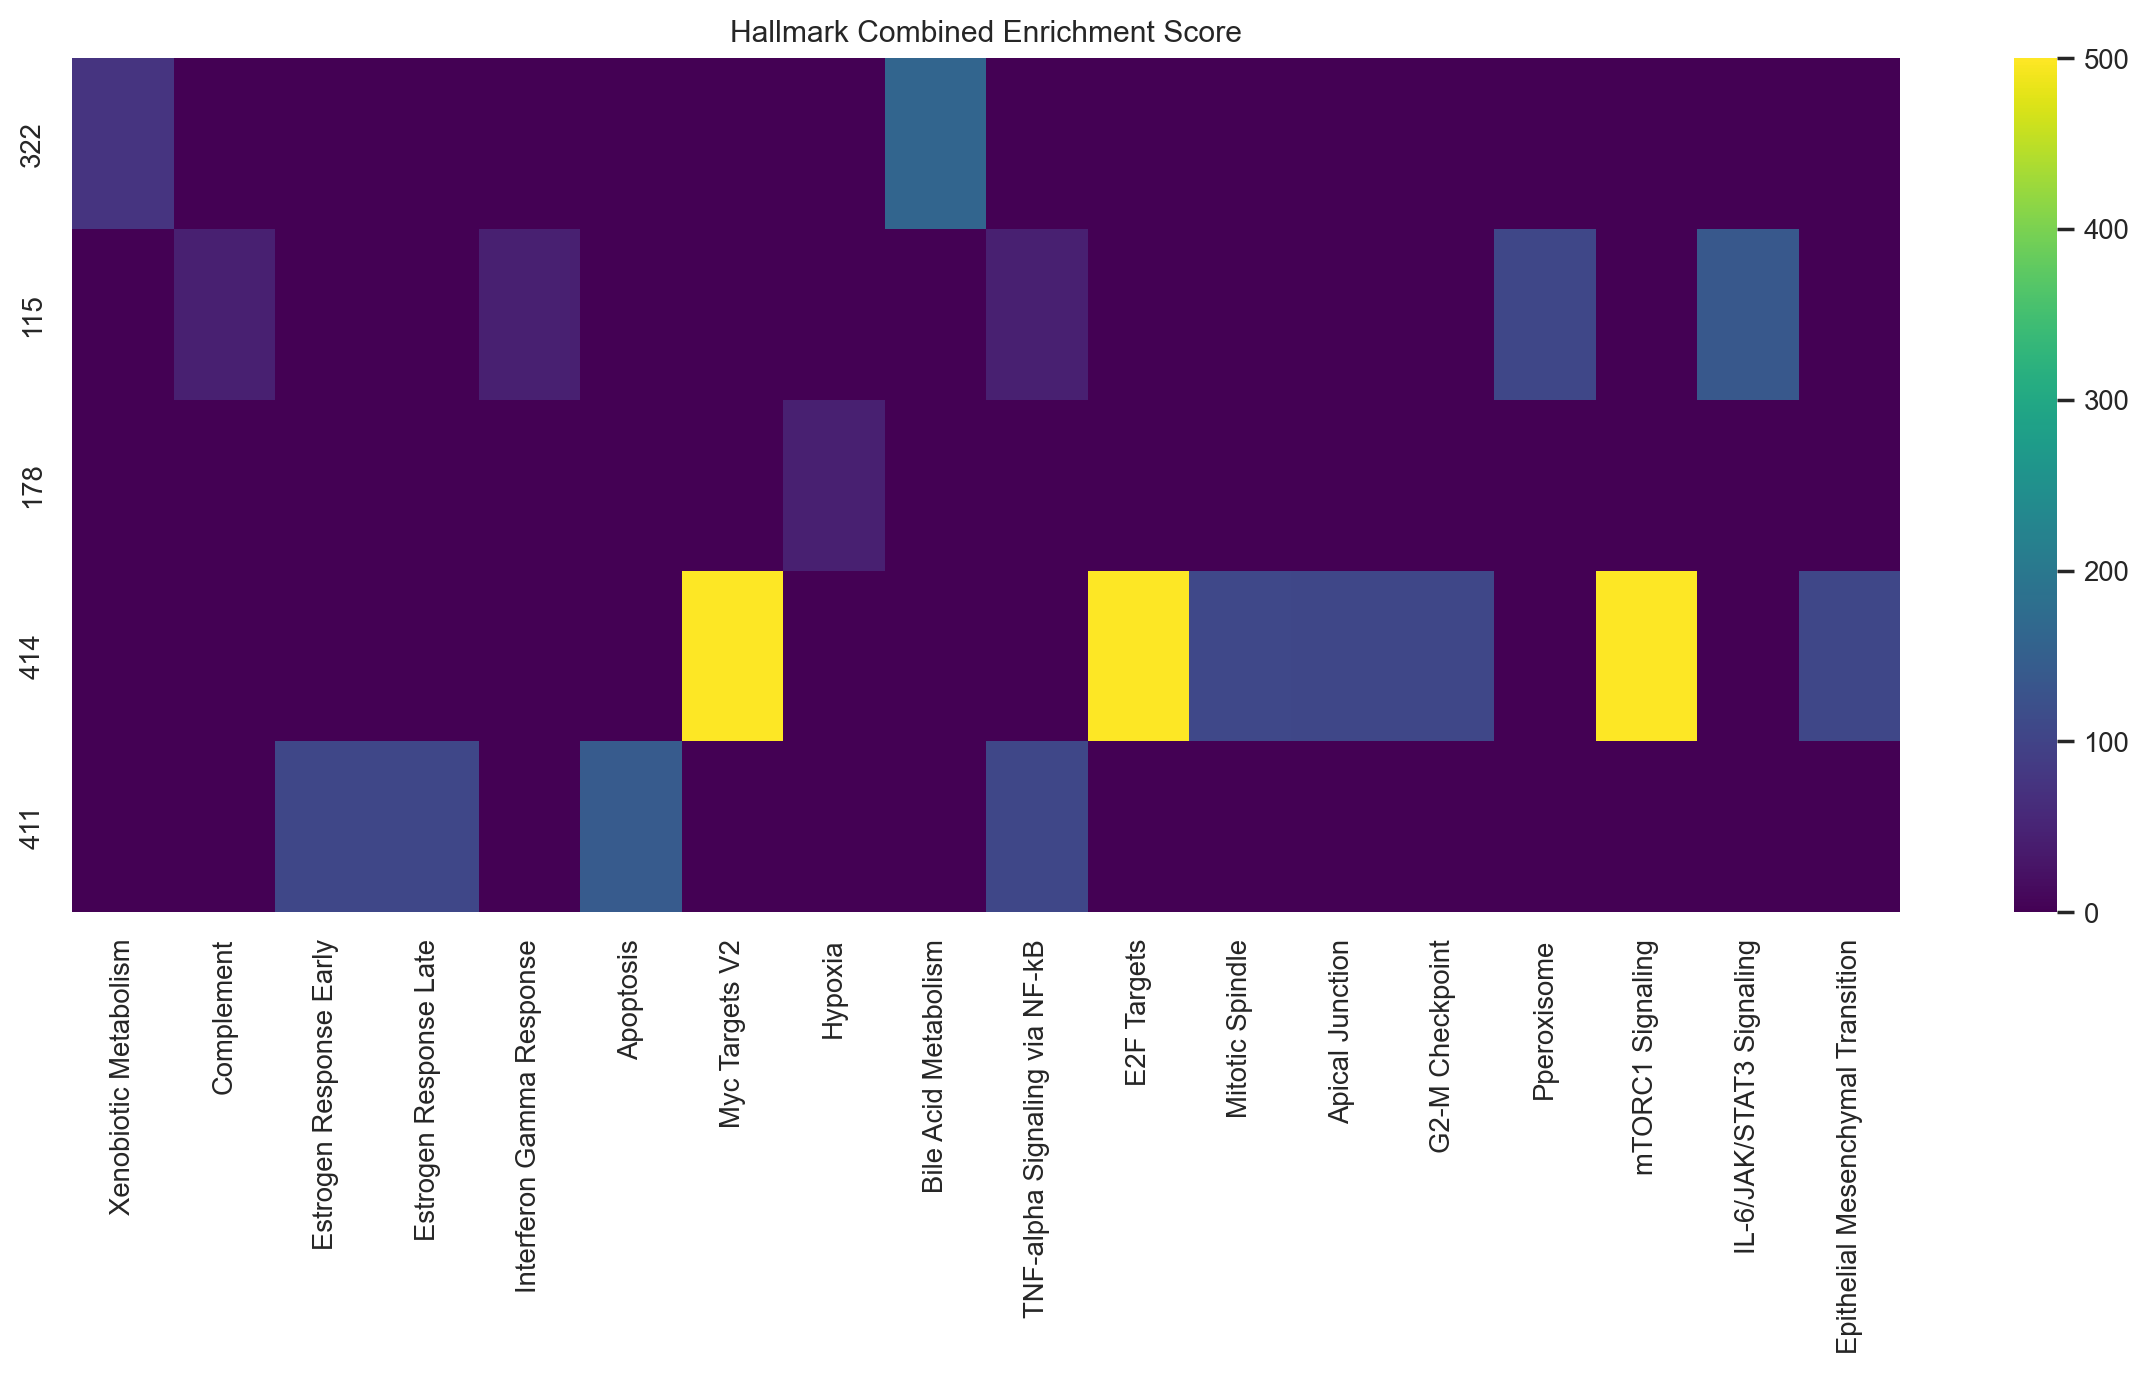

In [31]:
import pandas
sns.set(font_scale=0.9)
import gseapy as gp
enrc = collections.defaultdict(dict)
terms = set()
mgs = []
for mg, genes in mgs_up.items():
    enr = gp.enrichr(gene_list=genes,
                     gene_sets=['MSigDB_Hallmark_2020'],
                     organism='Human', 
                     description='test_name',
                     outdir='test/enrichr_kegg',
                     cutoff=0.001 
                    )    
    mgs.append(mg)
    for x,y in zip(enr.res2d["Term"],enr.res2d["Combined Score"]):
        if y > 0:
            enrc[mg][x] = y
            terms.add(x)
mat = []
for term in terms:
    row = []
    for mg in mgs:
        if term in enrc[mg]:
            row.append(enrc[mg][term])
        else:
            row.append(0.0)
    mat.append(row)
print(mat)
df = pandas.DataFrame(numpy.array(mat),columns=mgs,index=list(terms)).T
fig, ax = plt.subplots(1,1,figsize=(12,7))
sns.heatmap(df,yticklabels=True,xticklabels=True,ax=ax, vmax=500,cmap="viridis")
ax.set_title("Hallmark Combined Enrichment Score")
fig.tight_layout()
plt.savefig("/Users/ceglian/bowel_to_adnexa.svg")

/Users/ceglian/miniconda3/lib/python3.9/site-packages/gseapy/enrichr.py:427: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)
2022-11-15 14:25:47,034 Warning: No enrich terms using library MSigDB_Hallmark_2020 when cutoff = 0.001
/Users/ceglian/miniconda3/lib/python3.9/site-packages/gseapy/enrichr.py:427: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)
2022-11-15 14:25:48,633 Warning: No enrich terms using library MSigDB_Hallmark_2020 when cutoff = 0.001
/Users/ceglian/miniconda3/lib/python3.9/site-packages/gseapy/enrichr.py:427: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res

[[44.57906348265406, 0.0, 0.0, 0.0, 248.09171029141777], [0.0, 100.06299005053825, 49.05929049133134, 0.0, 330.935186241854], [44.57906348265406, 0.0, 0.0, 0.0, 0.0], [69.6183410331835, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 111.53906016025832, 0.0, 0.0], [44.57906348265406, 74.99696447567176, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 248.09171029141777], [0.0, 102.57514070844168, 0.0, 0.0, 339.24432771676044], [0.0, 74.99696447567176, 0.0, 0.0, 776.6239908457204], [0.0, 0.0, 0.0, 0.0, 44.57906348265406], [0.0, 0.0, 36.63622152285677, 0.0, 44.88750406424524], [0.0, 0.0, 0.0, 0.0, 44.57906348265406], [0.0, 0.0, 0.0, 0.0, 44.57906348265406], [0.0, 74.99696447567176, 0.0, 0.0, 0.0], [117.3530097985263, 0.0, 0.0, 0.0, 640.0219229585696], [44.57906348265406, 74.99696447567176, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 248.09171029141777], [0.0, 0.0, 36.38152974515558, 0.0, 248.09171029141777], [166.65780482203337, 0.0, 0.0, 0.0, 0.0], [0.0, 75.50233978585439, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 44.57906348

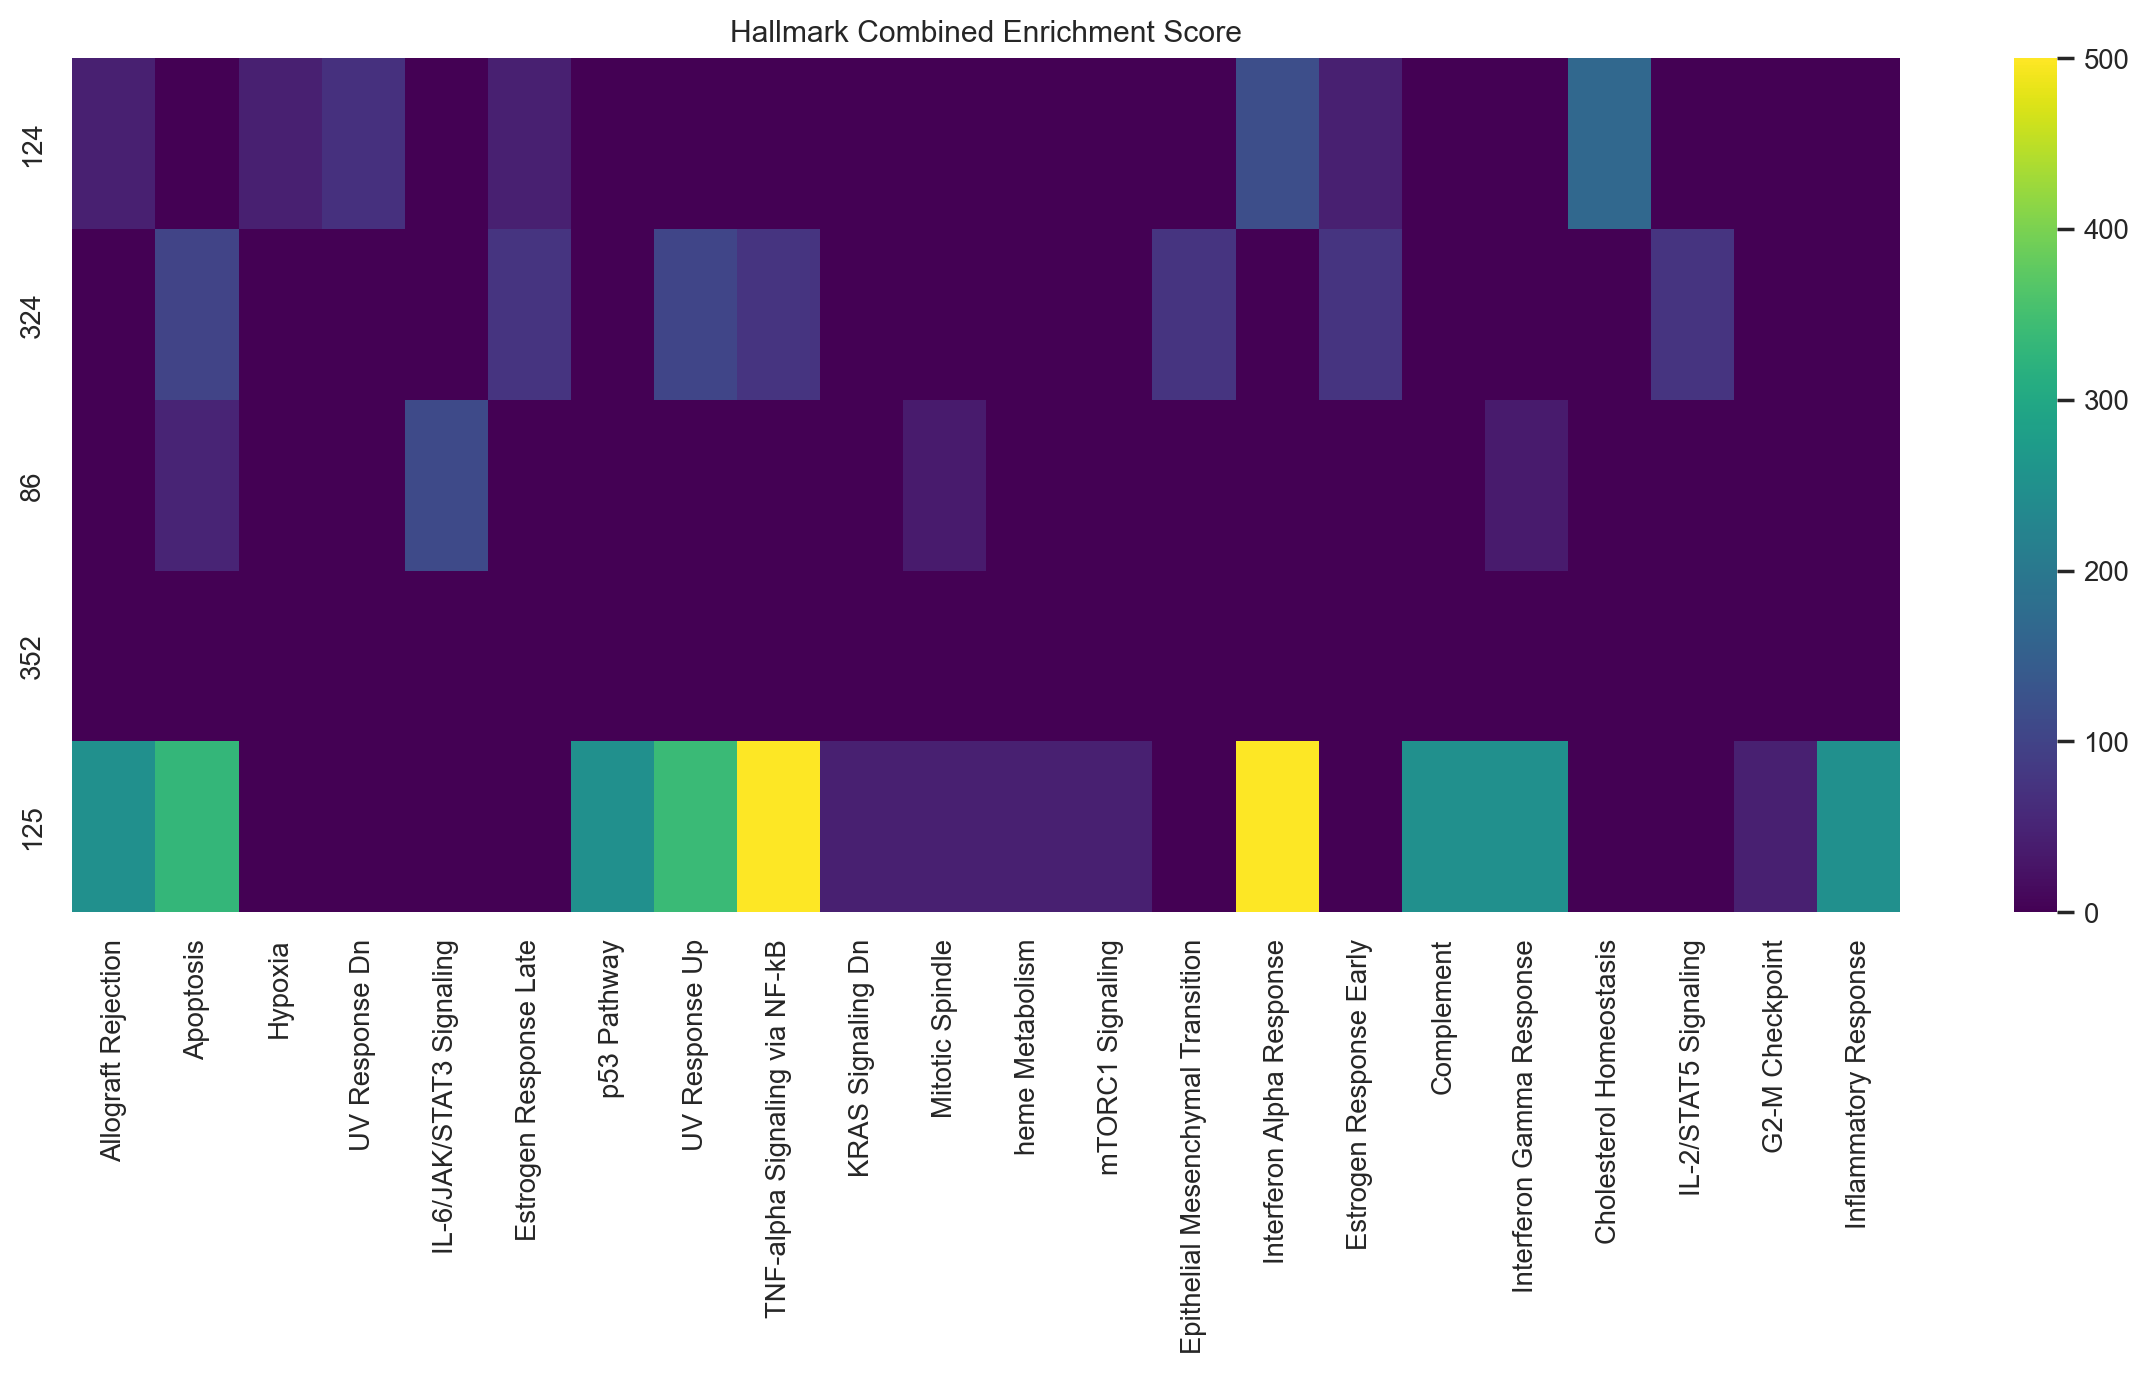

In [30]:
import pandas
sns.set(font_scale=0.9)
import seaborn as sns
import matplotlib
matplotlib.rcParams['svg.fonttype'] = "none"
import gseapy as gp
enrc = collections.defaultdict(dict)
terms = set()
mgs = []
for mg, genes in mgs_down.items():
    enr = gp.enrichr(gene_list=genes,
                     gene_sets=['MSigDB_Hallmark_2020'],
                     organism='Human', 
                     description='test_name',
                     outdir='test/enrichr_kegg',
                     cutoff=0.001 
                    )    
    mgs.append(mg)
    for x,y in zip(enr.res2d["Term"],enr.res2d["Combined Score"]):
        if y > 0:
            enrc[mg][x] = y
            terms.add(x)
mat = []
for term in terms:
    row = []
    for mg in mgs:
        if term in enrc[mg]:
            row.append(enrc[mg][term])
        else:
            row.append(0.0)
    mat.append(row)
print(mat)
df = pandas.DataFrame(numpy.array(mat),columns=mgs,index=list(terms)).T
fig, ax = plt.subplots(1,1,figsize=(12,7))
sns.heatmap(df,yticklabels=True,xticklabels=True,ax=ax, vmax=500,cmap="viridis")
ax.set_title("Hallmark Combined Enrichment Score")
fig.tight_layout()
plt.savefig("/Users/ceglian/adnexa_to_bowel.svg")